<a href="https://colab.research.google.com/github/sethgis/12/blob/main/Final_AEZ_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Making the necessary library installation including pandas, plotly, plotly express, seaborn**

They are used for reading data as dataframe, for data visualisation and neat visualisation respective

In [ ]:
!pip install pandas
!pip install seaborn 
!pip install plotly.express
!pip install numpy

**Importing the imported libraries for use** 

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the CSV data as a dataframe using pandas library in python**

In [ ]:
Rainfall_Sensor_1990_2020 = pd.read_csv('/content/drive/MyDrive/AEZ_MACHAKOS_CSV/Rainfall_csv_exports_ALL_1991-2020-2-3.csv')
Rainfall_Station_1990_2020 = pd.read_csv('/content/drive/MyDrive/AEZ_MACHAKOS_CSV/machakos-rain_station-2.csv')
Temperature_Sensor_1990_2020 = pd.read_csv('/content/drive/MyDrive/AEZ_MACHAKOS_CSV/Temperature_csv_exports_ALL_1990-2020.csv')
Temperature_Station_1990_2020 = pd.read_csv('/content/drive/MyDrive/AEZ_MACHAKOS_CSV/machakos-tmax-2_processed.csv')
Temperature_Sensor_1990_2020.head()
# Temperature_Station_1990_2020.head()
# Rainfall_Sensor_1990_2020
Rainfall_Sensor_1990_2020.tail()

Place   19910101  19910102  19910103  19910104  19910105  \
36  SyokimauMulolongo   0.000000       0.0       0.0  4.285144         0   
37               Tala   0.000000       0.0       0.0  6.435562         0   
38           unknown7   0.000000       0.0       0.0  4.154891         0   
39    UpperKaewaIveti   0.000000       0.0       0.0  7.572668         0   
40            Wamunyu  26.307291       0.0       0.0  0.000000         0   

    19910106  19910107  19910108  19910109  ...  20201222  20201223  20201224  \
36         0       0.0       0.0         0  ...         0         0         0   
37         0       0.0       0.0         0  ...         0         0         0   
38         0       0.0       0.0         0  ...         0         0         0   
39         0       0.0       0.0         0  ...         0         0         0   
40         0       0.0       0.0         0  ...         0         0         0   

    20201225  20201226  20201227  20201228  20201229  20201230   20201231  
36         0         0         0         0         0       0.0  17.920931  
37         0         0         0         0         0       0.0  66.242599  
38         0         0         0         0         0       0.0  17.132654  
39         0         0         0         0         0       0.0  45.345642  
40         0         0         0         0         0       0.0  32.743999  

[5 rows x 10959 columns]

**Transpose the sensor dataset (temperature and rainfall), to be in the same format with station datasets.** **using a function for the two dataframes. This will nessesitate plotting of the data in line graph, as seen in the next section.**

In [ ]:
# Rainfall_Sensor_1990_2020.head()
Temperature_Sensor_1990_2020

In [ ]:

def transpose(df):
  df2=df.T
  header=df2.iloc[0]
  df2=df2[1:]
  df2.columns=header
  df2.head()
  return df2

Rainfall_Sensor_1990_2020_T = Rainfall_Sensor_1990_2020.set_index('Place').T

Temperature_Sensor_1990_2020_T = Temperature_Sensor_1990_2020.set_index('Place').T

Rainfall_Sensor_1990_2020_T 
# Temperature_Sensor_1990_2020_T



Rainfall_Sensor_1990_2020_T .to_csv('Rainfall_Sensor_1990_2020_Transposed.csv', encoding='utf-8')

**Code that finds outlier in the datasets, however, we have to plot them first using box plots**

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(Rainfall_Station_1990_2020['AthiRiver'])
print(outliers)

In [ ]:
Rainfall_Station_1990_2020.head()

**Plotting Rainfall(sensor data) against Rainfall(Station data)** , **first you cast all the column inputs as integers in order for them to plot as numbers**

In [ ]:
Rainfall_Sensor_1990_2020_T 
Temperature_Sensor_1990_2020_T


# Rainfall_Station_1990_2020 = Rainfall_Station_1990_2020.astype({col:int for col in Rainfall_Station_1990_2020})
# Rainfall_Sensor_1990_2020_T = Rainfall_Sensor_1990_2020_T.astype({col:int for col in Rainfall_Sensor_1990_2020_T})
# for col in Rainfall_Sensor_1990_2020_T.columns:
#     print(col)

'\nrainfall plots for all the stations in Machakos County. The plots are Station data against sensor data'

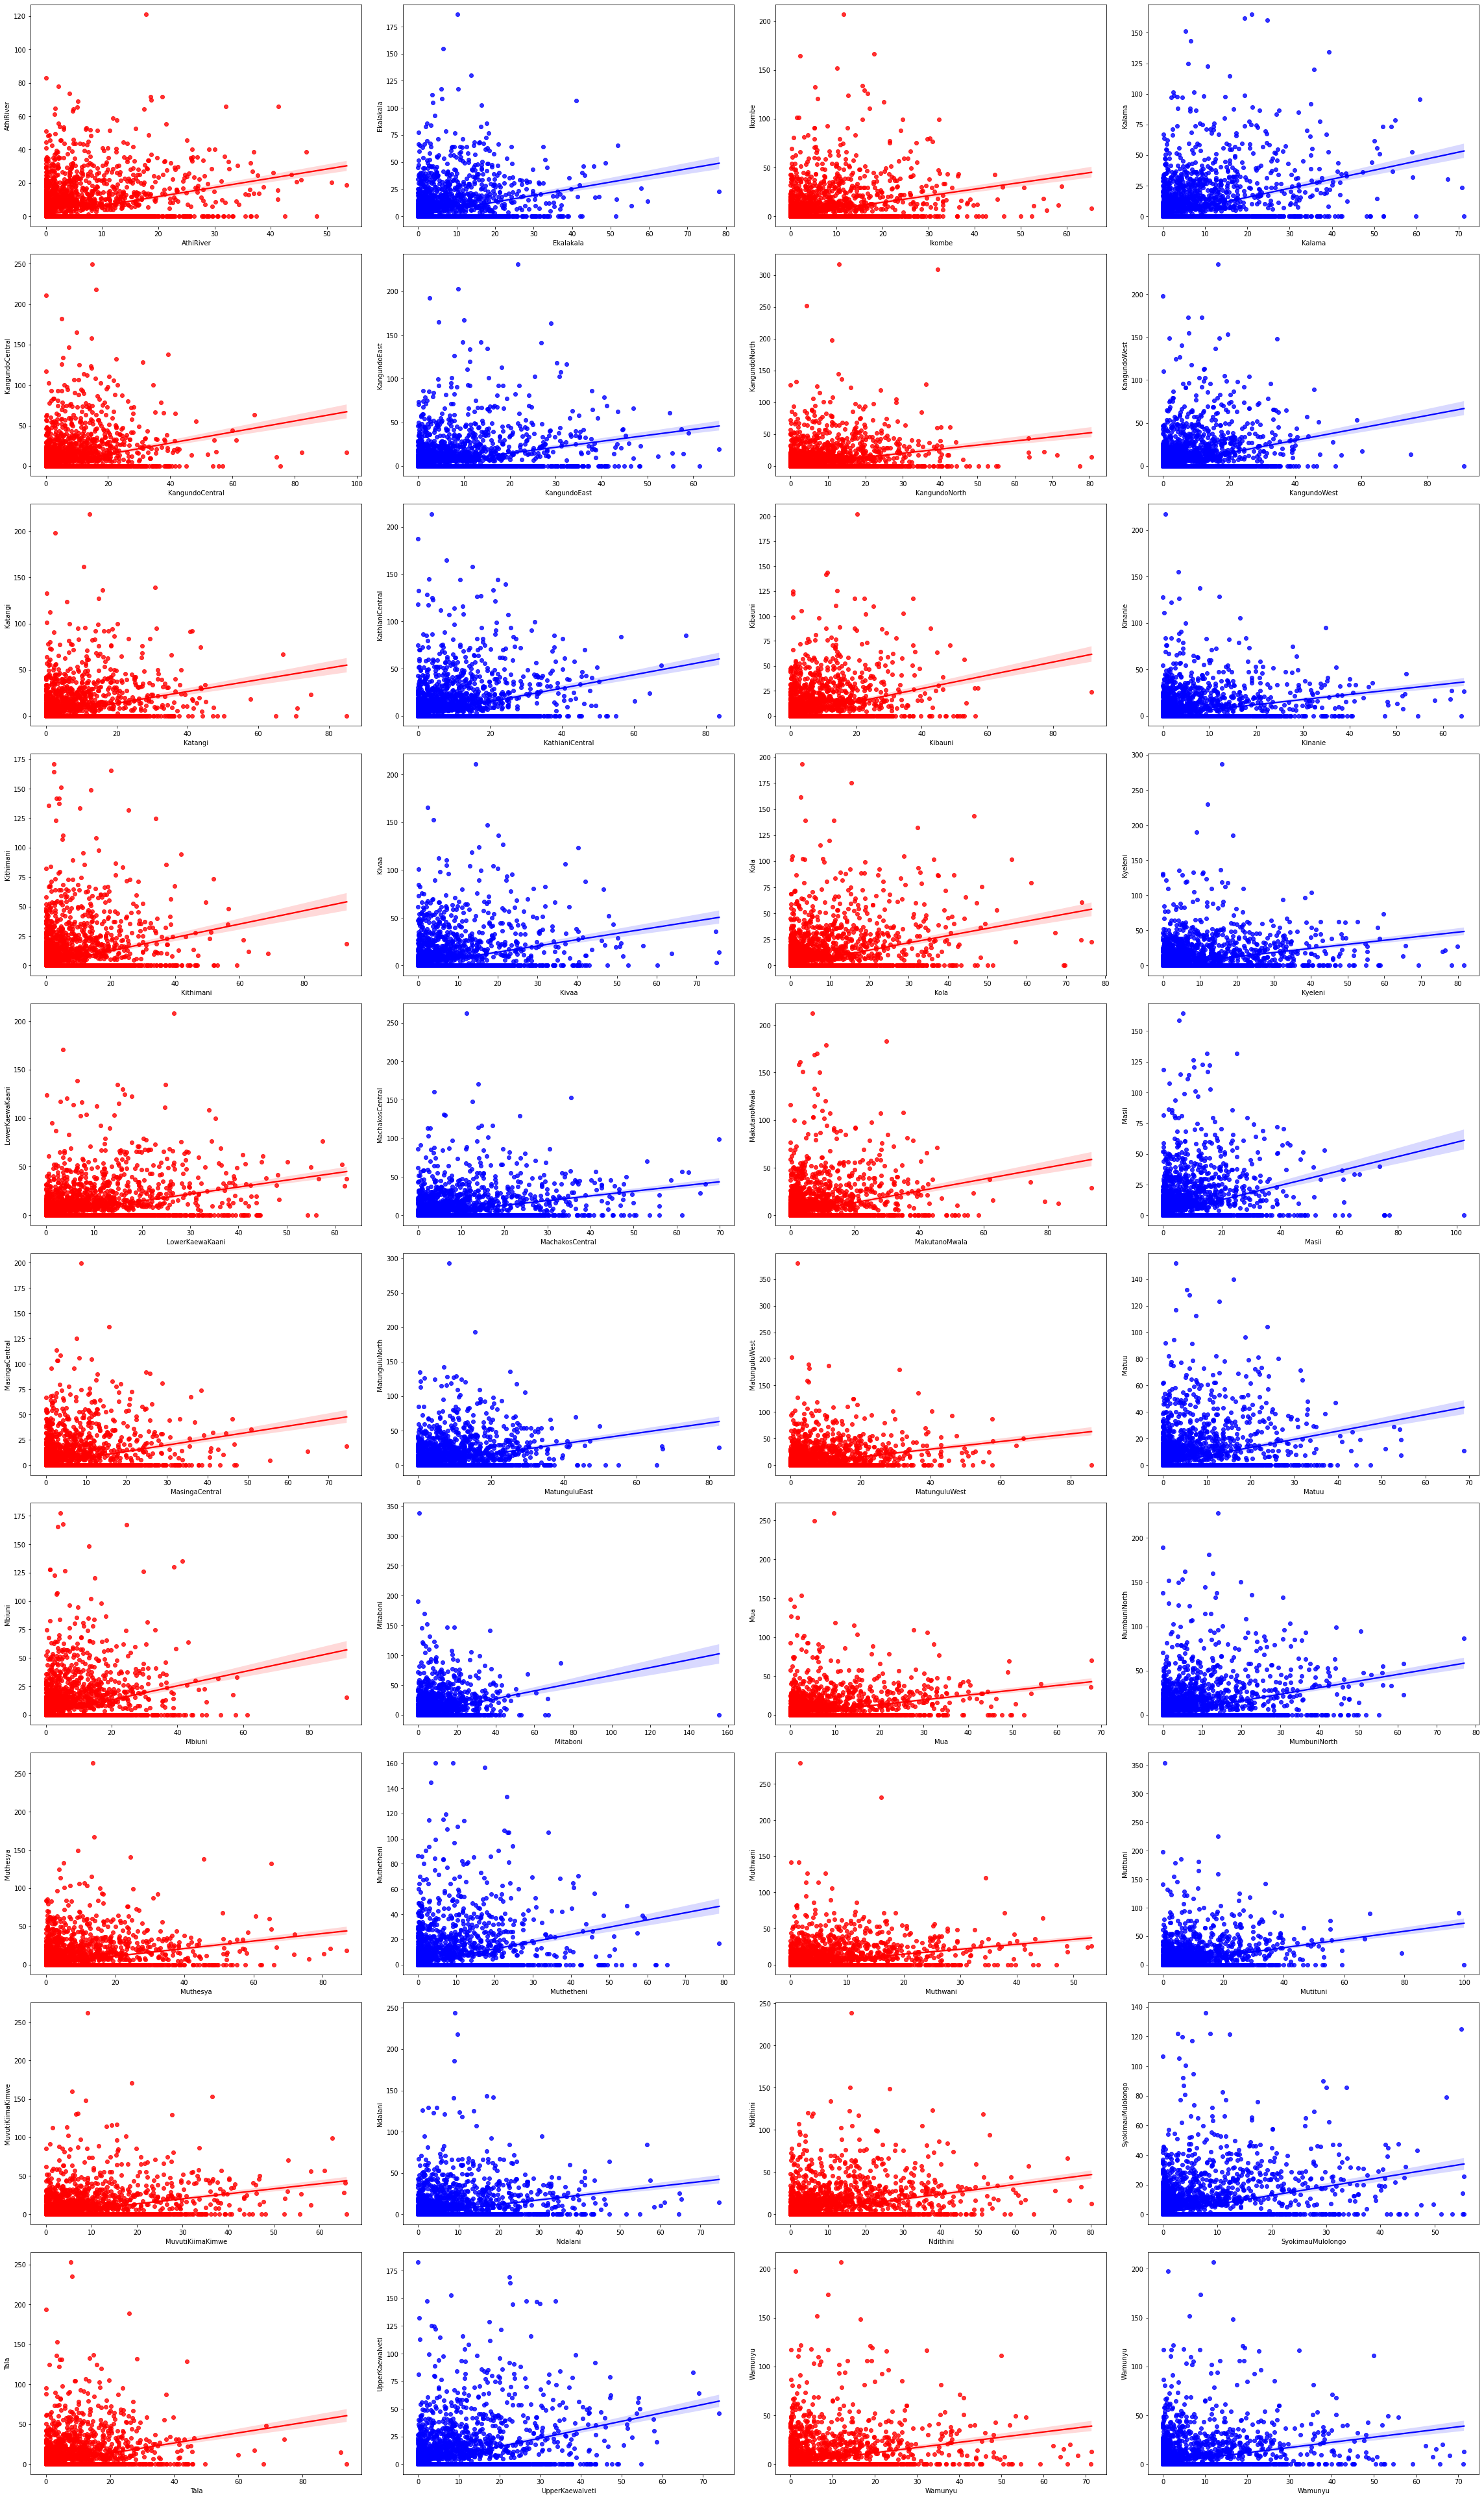

In [ ]:
# px.scatter(x=Rainfall_Station_1990_2020['Mutituni'], y=Rainfall_Sensor_1990_2020_T['Mutituni'], trendline="ols", title='Athi River')
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2



fig, axes = plt.subplots(10, 4, figsize=(40, 70))
 
# fig.suptitle('Station data against sensor data for Rainfall amounts (mm)')
# fig.tight_layout()
plt.rcParams["figure.autolayout"] = True
fig.subplots_adjust(hspace=0.125, wspace=0.125)

 
sns.regplot(ax=axes[0, 0], x=Rainfall_Station_1990_2020['AthiRiver'], y=Rainfall_Sensor_1990_2020_T['AthiRiver'], color='r')
sns.regplot(ax=axes[0, 1], x=Rainfall_Station_1990_2020['Ekalakala'], y=Rainfall_Sensor_1990_2020_T['Ekalakala'], color='b')
sns.regplot(ax=axes[0, 2], x=Rainfall_Station_1990_2020['Ikombe'], y=Rainfall_Sensor_1990_2020_T['Ikombe'], color='r')
sns.regplot(ax=axes[0, 3], x=Rainfall_Station_1990_2020['Kalama'], y=Rainfall_Sensor_1990_2020_T['Kalama'], color='b')
sns.regplot(ax=axes[1, 0], x=Rainfall_Station_1990_2020['KangundoCentral'], y=Rainfall_Sensor_1990_2020_T['KangundoCentral'], color='r')
sns.regplot(ax=axes[1, 1], x=Rainfall_Station_1990_2020['KangundoEast'], y=Rainfall_Sensor_1990_2020_T['KangundoEast'], color='b')
sns.regplot(ax=axes[1, 2], x=Rainfall_Station_1990_2020['KangundoNorth'], y=Rainfall_Sensor_1990_2020_T['KangundoNorth'],color='r')
sns.regplot(ax=axes[1, 3], x=Rainfall_Station_1990_2020['KangundoWest'], y=Rainfall_Sensor_1990_2020_T['KangundoWest'], color='b')


sns.regplot(ax=axes[2, 0], x=Rainfall_Station_1990_2020['Katangi'], y=Rainfall_Sensor_1990_2020_T['Katangi'], color='r')
sns.regplot(ax=axes[2, 1], x=Rainfall_Station_1990_2020['KathianiCentral'], y=Rainfall_Sensor_1990_2020_T['KathianiCentral'], color='b')
sns.regplot(ax=axes[2, 2], x=Rainfall_Station_1990_2020['Kibauni'], y=Rainfall_Sensor_1990_2020_T['Kibauni'], color='r')
sns.regplot(ax=axes[2, 3], x=Rainfall_Station_1990_2020['Kinanie'], y=Rainfall_Sensor_1990_2020_T['Kinanie'], color='b')

sns.regplot(ax=axes[3, 0], x=Rainfall_Station_1990_2020['Kithimani'], y=Rainfall_Sensor_1990_2020_T['Kithimani'], color='r')
sns.regplot(ax=axes[3, 1], x=Rainfall_Station_1990_2020['Kivaa'], y=Rainfall_Sensor_1990_2020_T['Kivaa'], color='b')
sns.regplot(ax=axes[3, 2], x=Rainfall_Station_1990_2020['Kola'], y=Rainfall_Sensor_1990_2020_T['Kola'], color='r')
sns.regplot(ax=axes[3, 3], x=Rainfall_Station_1990_2020['Kyeleni'], y=Rainfall_Sensor_1990_2020_T['Kyeleni'], color='b')

sns.regplot(ax=axes[4, 0], x=Rainfall_Station_1990_2020['LowerKaewaKaani'], y=Rainfall_Sensor_1990_2020_T['LowerKaewaKaani'], color='r')
sns.regplot(ax=axes[4, 1], x=Rainfall_Station_1990_2020['MachakosCentral'], y=Rainfall_Sensor_1990_2020_T['MachakosCentral'], color='b')
sns.regplot(ax=axes[4, 2], x=Rainfall_Station_1990_2020['MakutanoMwala'], y=Rainfall_Sensor_1990_2020_T['MakutanoMwala'], color='r')
sns.regplot(ax=axes[4, 3], x=Rainfall_Station_1990_2020['Masii'], y=Rainfall_Sensor_1990_2020_T['Masii'], color='b')

sns.regplot(ax=axes[5, 0], x=Rainfall_Station_1990_2020['MasingaCentral'], y=Rainfall_Sensor_1990_2020_T['MasingaCentral'],color='r')
sns.regplot(ax=axes[5, 1], x=Rainfall_Station_1990_2020['MatunguluEast'], y=Rainfall_Sensor_1990_2020_T['MatunguluNorth'], color='b')
sns.regplot(ax=axes[5, 2], x=Rainfall_Station_1990_2020['MatunguluWest'], y=Rainfall_Sensor_1990_2020_T['MatunguluWest'], color='r')
sns.regplot(ax=axes[5, 3], x=Rainfall_Station_1990_2020['Matuu'], y=Rainfall_Sensor_1990_2020_T['Matuu'], color='b')

sns.regplot(ax=axes[6, 0], x=Rainfall_Station_1990_2020['Mbiuni'], y=Rainfall_Sensor_1990_2020_T['Mbiuni'], color='r')
sns.regplot(ax=axes[6, 1], x=Rainfall_Station_1990_2020['Mitaboni'], y=Rainfall_Sensor_1990_2020_T['Mitaboni'], color='b')
sns.regplot(ax=axes[6, 2], x=Rainfall_Station_1990_2020['Mua'], y=Rainfall_Sensor_1990_2020_T['Mua'], color='r')
sns.regplot(ax=axes[6, 3], x=Rainfall_Station_1990_2020['MumbuniNorth'], y=Rainfall_Sensor_1990_2020_T['MumbuniNorth'], color='b')

sns.regplot(ax=axes[7, 0], x=Rainfall_Station_1990_2020['Muthesya'], y=Rainfall_Sensor_1990_2020_T['Muthesya'], color='r')
sns.regplot(ax=axes[7, 1], x=Rainfall_Station_1990_2020['Muthetheni'], y=Rainfall_Sensor_1990_2020_T['Muthetheni'], color='b')
sns.regplot(ax=axes[7, 2], x=Rainfall_Station_1990_2020['Muthwani'], y=Rainfall_Sensor_1990_2020_T['Muthwani'], color='r')
sns.regplot(ax=axes[7, 3], x=Rainfall_Station_1990_2020['Mutituni'], y=Rainfall_Sensor_1990_2020_T['Mutituni'], color='b')

sns.regplot(ax=axes[8, 0], x=Rainfall_Station_1990_2020['MuvutiKiimaKimwe'], y=Rainfall_Sensor_1990_2020_T['MuvutiKiimaKimwe'], color='r')
sns.regplot(ax=axes[8, 1], x=Rainfall_Station_1990_2020['Ndalani'], y=Rainfall_Sensor_1990_2020_T['Ndalani'], color='b')
sns.regplot(ax=axes[8, 2], x=Rainfall_Station_1990_2020['Ndithini'], y=Rainfall_Sensor_1990_2020_T['Ndithini'], color='r')
sns.regplot(ax=axes[8, 3], x=Rainfall_Station_1990_2020['SyokimauMulolongo'], y=Rainfall_Sensor_1990_2020_T['SyokimauMulolongo'], color='b')

sns.regplot(ax=axes[9, 0], x=Rainfall_Station_1990_2020['Tala'], y=Rainfall_Sensor_1990_2020_T['Tala'], color='r')
sns.regplot(ax=axes[9, 1], x=Rainfall_Station_1990_2020['UpperKaewaIveti'], y=Rainfall_Sensor_1990_2020_T['UpperKaewaIveti'], color='b')
sns.regplot(ax=axes[9, 2], x=Rainfall_Station_1990_2020['Wamunyu'], y=Rainfall_Sensor_1990_2020_T['Wamunyu'], color='r')
sns.regplot(ax=axes[9, 3], x=Rainfall_Station_1990_2020['Wamunyu'], y=Rainfall_Sensor_1990_2020_T['Wamunyu'], color='b')

"""
rainfall plots for all the stations in Machakos County. The plots are Station data against sensor data"""


**Accuracy assessment table for each station** **of observed rainfall against station data**

In [ ]:
Rainfall_Station_1990_2020['AthiRiver']

In [ ]:
from sklearn.metrics import confusion_matrix

# confusion_matrix(Rainfall_Station_1990_2020['AthiRiver'], Rainfall_Sensor_1990_2020_T['AthiRiver'])
y_pred = Rainfall_Sensor_1990_2020_T['AthiRiver']

y_act = Rainfall_Station_1990_2020['AthiRiver']
# df_confusion = pd.crosstab(y_pred, y_act, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix = pd.crosstab(y_pred, y_act, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

# sns.regplot(ax=axes[0, 0], x=Rainfall_Station_1990_2020['AthiRiver'], y=Rainfall_Sensor_1990_2020_T['AthiRiver'], color='r')
# sns.regplot(ax=axes[0, 1], x=Rainfall_Station_1990_2020['Ekalakala'], y=Rainfall_Sensor_1990_2020_T['Ekalakala'], color='b')
# sns.regplot(ax=axes[0, 2], x=Rainfall_Station_1990_2020['Ikombe'], y=Rainfall_Sensor_1990_2020_T['Ikombe'], color='r')
# sns.regplot(ax=axes[0, 3], x=Rainfall_Station_1990_2020['Kalama'], y=Rainfall_Sensor_1990_2020_T['Kalama'], color='b')
# sns.regplot(ax=axes[1, 0], x=Rainfall_Station_1990_2020['KangundoCentral'], y=Rainfall_Sensor_1990_2020_T['KangundoCentral'], color='r')
# sns.regplot(ax=axes[1, 1], x=Rainfall_Station_1990_2020['KangundoEast'], y=Rainfall_Sensor_1990_2020_T['KangundoEast'], color='b')
# sns.regplot(ax=axes[1, 2], x=Rainfall_Station_1990_2020['KangundoNorth'], y=Rainfall_Sensor_1990_2020_T['KangundoNorth'],color='r')
# sns.regplot(ax=axes[1, 3], x=Rainfall_Station_1990_2020['KangundoWest'], y=Rainfall_Sensor_1990_2020_T['KangundoWest'], color='b')

Empty DataFrame
Columns: []
Index: []


**Plotting line of best fit for any of the station data. The station rainfall against sensor based data.**

LinregressResult(slope=0.5513370992444989, intercept=0.7266256230929097, rvalue=0.3893849843432272, pvalue=0.0, stderr=0.01245968450409009, intercept_stderr=0.05862014661338493)
LinregressResult(slope=0.5513370992444989, intercept=0.7266256230929097, rvalue=0.3893849843432272, pvalue=0.0, stderr=0.01245968450409009, intercept_stderr=0.05862014661338493)
LinregressResult(slope=0.61519116435764, intercept=0.7439009616100223, rvalue=0.3691444869577006, pvalue=0.0, stderr=0.014797122974324936, intercept_stderr=0.07947828823366618)


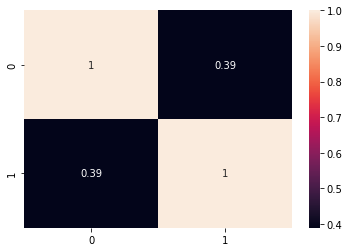

In [ ]:
from scipy.stats import linregress

from sklearn.metrics import r2_score
linregress(Rainfall_Station_1990_2020['AthiRiver'], Rainfall_Sensor_1990_2020_T['AthiRiver'])
pearsons_coefficient = np.corrcoef(Rainfall_Station_1990_2020['AthiRiver'], Rainfall_Sensor_1990_2020_T['AthiRiver'])
sns.heatmap(pearsons_coefficient, annot=True)
print(linregress(Rainfall_Station_1990_2020['AthiRiver'], Rainfall_Sensor_1990_2020_T['AthiRiver']))
print(linregress(Rainfall_Station_1990_2020['AthiRiver'], Rainfall_Sensor_1990_2020_T['AthiRiver']))
print(linregress(Rainfall_Station_1990_2020['Ekalakala'], Rainfall_Sensor_1990_2020_T['Ekalakala']))


**Plotting confusion matrix of rainfall dataset**

In [ ]:
Temperature_Sensor_1990_2020_T = Temperature_Sensor_1990_2020_T.head().reset_index()
Temperature_Station_1990_2020 = Temperature_Station_1990_2020.head()

**Repeating the process above for temperature data, with scatter plots, and producing line of best fit** First by making sure that both the datasets are equal in terms of length. Station data was observed to have fewer columns than sensor's data. This was done through merging of both dataframes and then dropping the null values. 

In [ ]:
Temperature_Station_1990_2020.head()
Temperature_Sensor_1990_2020_T.head()

In [ ]:
# Temperature_Sensor_1990_2020_T = Temperature_Sensor_1990_2020_T.reset_index(drop=True)
# Temperature_Sensor_1990_2020_T.head()



Temperature_Sensor_1990_2020_T.rename(columns = {'index':'Date'}, inplace = True)
Temperature_Station_1990_2020.rename(columns = {'ID':'Date'}, inplace = True)
Temperature_Station_1990_2020.head()
# Temperature_Sensor_1990_2020_T.drop([0,1], axis=0, inplace=True)
Temperature_Station_1990_2020.tail()
# Temperature_Sensor_1990_2020_T.tail()
# df.drop([5,6], axis=0, inplace=True)


# Temperature_Sensor_1990_2020_T.drop('Date', inplace=True, axis=1)
# Temperature_Sensor_1990_2020_T.head()
# Temperature_Sensor_1990_2020_T.drop(['Place', 'Date', 'Date', 'level_0'], axis=1)
# Temperature_Station_1990_2020.head()


In [ ]:
Temperature_Sensor= pd.read_csv('/content/drive/MyDrive/AEZ_MACHAKOS_CSV/Temperature_csv_exports_ALL_1990-2020.csv')
Temperature_Station = pd.read_csv('/content/drive/MyDrive/AEZ_MACHAKOS_CSV/machakos-tmax-2_processed.csv')
Temperature_Station.head()
Temperature_Sensor.head()
Temperature_Sensor_T = Temperature_Sensor.drop(['Latitude','Longitude'], axis=1).set_index('Place').T.reset_index()
Temperature_Sensor_T.head()

Place     index   AthiRiver   Ekalakala      Ikombe      Kalama  \
0      19900101  290.254364  293.274414  292.580963  291.166962   
1      19900102  290.332977  294.672943  293.524506  291.633942   
2      19900103  290.393280  294.432831  293.306580  291.711762   
3      19900104  290.647797  294.568603  293.201904  291.540070   
4      19900105  291.102783  294.532715  293.233551  291.798431   

Place  KangundoCentral  KangundoEast  KangundoNorth  KangundoWest     Katangi  \
0           291.513611    291.513611     291.513611    291.513611  292.580963   
1           292.380341    292.380341     292.380341    292.380341  293.524506   
2           292.422363    292.422363     292.422363    292.422363  293.306580   
3           292.319702    292.319702     292.319702    292.319702  293.201904   
4           292.484039    292.484039     292.484039    292.484039  293.233551   

Place  ...    Muthwani    Mutituni  MuvutiKiimaKimwe     Ndalani    Ndithini  \
0      ...  290.626373  291.513611        291.166962  291.521790  291.874725   
1      ...  291.181488  292.380341        291.633942  292.412018  292.852142   
2      ...  291.373199  292.422363        291.711762  292.679199  293.016571   
3      ...  291.413330  292.319702        291.540070  292.673920  293.156647   
4      ...  291.702362  292.484039        291.798431  292.736511  293.116974   

Place  SyokimauMulolongo        Tala    unknown7  UpperKaewaIveti     Wamunyu  
0             290.254364  291.513611  290.586639       291.513611  292.580963  
1             290.332977  292.380341  290.680939       292.380341  293.524506  
2             290.393280  292.422363  290.871796       292.422363  293.306580  
3             290.647797  292.319702  290.863586       292.319702  293.201904  
4             291.102783  292.484039  291.245941       292.484039  293.233551  

[5 rows x 42 columns]

In [ ]:
""" printing the column heads for temeprature data for refernce"""
print(Temperature_Sensor_T.columns)
print(Temperature_Station.columns)

In [ ]:
Temperature_Sensor_T.rename(columns = {'index':'Date'}, inplace = True)
Temperature_Station.rename(columns = {'ID':'Date'}, inplace = True)
Temperature_Station_1990_2020.head()

In [ ]:

"""
Station data was inadequate as it covered up to July 2020, while sensor data covered up to December.
To plot correlation plots, equal length of data is needed, thus merging of dataframes to eliminate the 
null values, and have an equal length of data
"""
Temperature_Sensor_T['Date']=Temperature_Sensor_T['Date'].astype(int)

Temperature_Station['Date']=Temperature_Station['Date'].astype(int)


Merged_data_Sensor_Station = pd.merge(Temperature_Sensor_T, Temperature_Station, on="Date")
Merged_data_Sensor_Station.tail()
print(Merged_data_Sensor_Station.columns)
Merged_data_Sensor_Station.tail()

In [ ]:
Temperature_Sensor_1990_2020_T.rename(columns = {'index':'Date'}, inplace = True)
Temperature_Station_1990_2020.rename(columns = {'ID':'Date'}, inplace = True)
Temperature_Station_1990_2020.head()

print(Merged_data_Sensor_Station.columns)

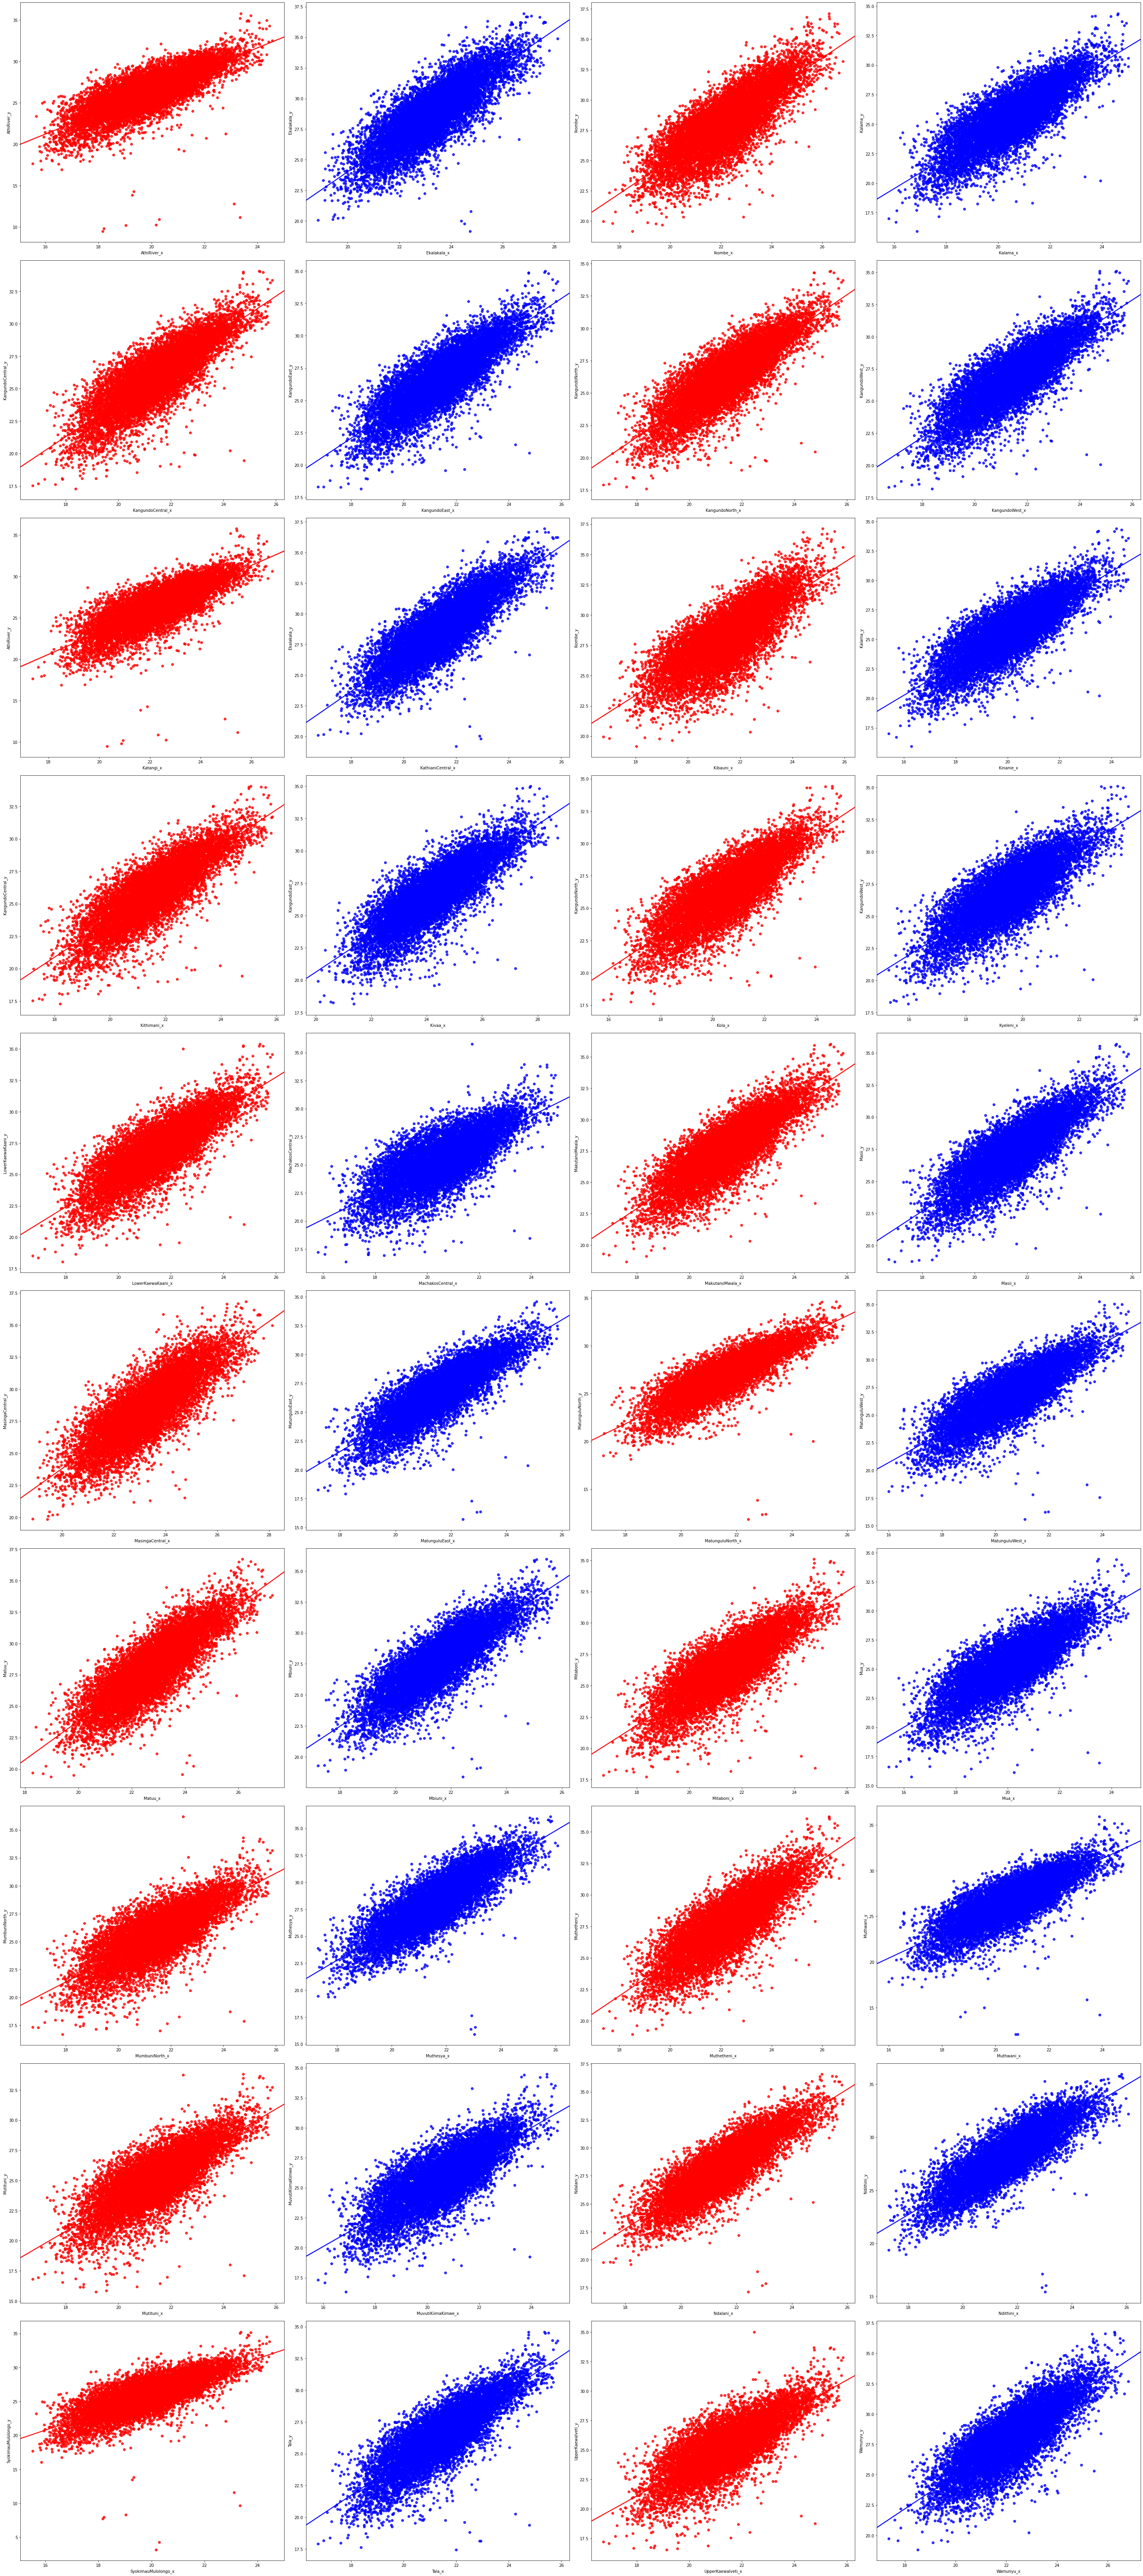

In [ ]:
fig, axes = plt.subplots(10, 4, figsize=(40, 90))
 
# fig.suptitle('Station data against sensor data for Rainfall amounts (mm)')
# fig.tight_layout()
plt.rcParams["figure.autolayout"] = True
fig.subplots_adjust(hspace=0.125, wspace=0.125)


"""transforming kelvin temperature to degree celcius before plotting by subtracting 271.15 """
sns.regplot(ax=axes[0, 0], x=(Merged_data_Sensor_Station['AthiRiver_x'] -272.15), y=Merged_data_Sensor_Station['AthiRiver_y'], color='r', truncate=False)
sns.regplot(ax=axes[0, 1], x=Merged_data_Sensor_Station['Ekalakala_x']-272.15, y=Merged_data_Sensor_Station['Ekalakala_y'], color='b',ci=68, truncate=False)
sns.regplot(ax=axes[0, 2], x=Merged_data_Sensor_Station['Ikombe_x']-272.15, y=Merged_data_Sensor_Station['Ikombe_y'], color='r', ci=68, truncate=False)
sns.regplot(ax=axes[0, 3], x=Merged_data_Sensor_Station['Kalama_x']-272.15, y=Merged_data_Sensor_Station['Kalama_y'], color='b', ci=68, truncate=False)
sns.regplot(ax=axes[1, 0], x=Merged_data_Sensor_Station['KangundoCentral_x']-272.15, y=Merged_data_Sensor_Station['KangundoCentral_y'], color='r', ci=68, truncate=False)
sns.regplot(ax=axes[1, 1], x=Merged_data_Sensor_Station['KangundoEast_x']-272.15, y=Merged_data_Sensor_Station['KangundoEast_y'], color='b', ci=68, truncate=False)
sns.regplot(ax=axes[1, 2], x=Merged_data_Sensor_Station['KangundoNorth_x']-272.15, y=Merged_data_Sensor_Station['KangundoNorth_y'],color='r', ci=68, truncate=False)
sns.regplot(ax=axes[1, 3], x=Merged_data_Sensor_Station['KangundoWest_x']-272.15, y=Merged_data_Sensor_Station['KangundoWest_y'], color='b', ci=68, truncate=False)


sns.regplot(ax=axes[2, 0], x=(Merged_data_Sensor_Station['Katangi_x'] -272.15), y=Merged_data_Sensor_Station['AthiRiver_y'], color='r', truncate=False)
sns.regplot(ax=axes[2, 1], x=Merged_data_Sensor_Station['KathianiCentral_x']-272.15, y=Merged_data_Sensor_Station['Ekalakala_y'], color='b',ci=68, truncate=False)
sns.regplot(ax=axes[2, 2], x=Merged_data_Sensor_Station['Kibauni_x']-272.15, y=Merged_data_Sensor_Station['Ikombe_y'], color='r', ci=68, truncate=False)
sns.regplot(ax=axes[2, 3], x=Merged_data_Sensor_Station['Kinanie_x']-272.15, y=Merged_data_Sensor_Station['Kalama_y'], 
            color='b', ci=68, truncate=False)

sns.regplot(ax=axes[3, 0], x=Merged_data_Sensor_Station['Kithimani_x']-272.15, y=Merged_data_Sensor_Station['KangundoCentral_y'], color='r', ci=68, truncate=False)
sns.regplot(ax=axes[3, 1], x=Merged_data_Sensor_Station['Kivaa_x']-272.15, y=Merged_data_Sensor_Station['KangundoEast_y'], color='b', ci=68, truncate=False)
sns.regplot(ax=axes[3, 2], x=Merged_data_Sensor_Station['Kola_x']-272.15, y=Merged_data_Sensor_Station['KangundoNorth_y'],color='r', ci=68, truncate=False)
sns.regplot(ax=axes[3, 3], x=Merged_data_Sensor_Station['Kyeleni_x']-272.15, y=Merged_data_Sensor_Station['KangundoWest_y'], color='b', ci=68, truncate=False)

"""
 'LowerKaewaKaani_x', 'MachakosCentral_x', 'MakutanoMwala_x', 'Masii_x',
       
       'MasingaCentral_x', 'MatunguluEast_x', 'MatunguluNorth_x',
       'MatunguluWest_x', 
       
       'Matuu_x', 'Mbiuni_x', 'Mitaboni_x', 'Mua_x',
       
       
       'MumbuniNorth_x', 'Muthesya_x', 'Muthetheni_x', 'Muthwani_x',


       'Mutituni_x', 'MuvutiKiimaKimwe_x', 'Ndalani_x', 'Ndithini_x',
       'SyokimauMulolongo_x', 'Tala_x', 'unknown7_x', 'UpperKaewaIveti_x',
       'Wamunyu_x' """




sns.regplot(ax=axes[4, 0], x=Merged_data_Sensor_Station['LowerKaewaKaani_x']-272.15, y=Merged_data_Sensor_Station['LowerKaewaKaani_y'], color='r', ci=68, truncate=False)
sns.regplot(ax=axes[4, 1], x=Merged_data_Sensor_Station['MachakosCentral_x']-272.15, y=Merged_data_Sensor_Station['MachakosCentral_y'], color='b', ci=68, truncate=False)
sns.regplot(ax=axes[4, 2], x=Merged_data_Sensor_Station['MakutanoMwala_x']-272.15, y=Merged_data_Sensor_Station['MakutanoMwala_y'],color='r', ci=68, truncate=False)
sns.regplot(ax=axes[4, 3], x=Merged_data_Sensor_Station['Masii_x']-272.15, y=Merged_data_Sensor_Station['Masii_y'], color='b', ci=68, truncate=False)


sns.regplot(ax=axes[5, 0], x=Merged_data_Sensor_Station['MasingaCentral_x']-272.15, y=Merged_data_Sensor_Station['MasingaCentral_y'], color='r', ci=68, truncate=False)
sns.regplot(ax=axes[5, 1], x=Merged_data_Sensor_Station['MatunguluEast_x']-272.15, y=Merged_data_Sensor_Station['MatunguluEast_y'], color='b', ci=68, truncate=False)
sns.regplot(ax=axes[5, 2], x=Merged_data_Sensor_Station['MatunguluNorth_x']-272.15, y=Merged_data_Sensor_Station['MatunguluNorth_y'],color='r', ci=68, truncate=False)
sns.regplot(ax=axes[5, 3], x=Merged_data_Sensor_Station['MatunguluWest_x']-272.15, y=Merged_data_Sensor_Station['MatunguluWest_y'], color='b', ci=68, truncate=False)

sns.regplot(ax=axes[6, 0], x=Merged_data_Sensor_Station['Matuu_x']-272.15, y=Merged_data_Sensor_Station['Matuu_y'], color='r', ci=68, truncate=False)
sns.regplot(ax=axes[6, 1], x=Merged_data_Sensor_Station['Mbiuni_x']-272.15, y=Merged_data_Sensor_Station['Mbiuni_y'], color='b', ci=68, truncate=False)
sns.regplot(ax=axes[6, 2], x=Merged_data_Sensor_Station['Mitaboni_x']-272.15, y=Merged_data_Sensor_Station['Mitaboni_y'],color='r', ci=68, truncate=False)
sns.regplot(ax=axes[6, 3], x=Merged_data_Sensor_Station['Mua_x']-272.15, y=Merged_data_Sensor_Station['Mua_y'], color='b', ci=68, truncate=False)

sns.regplot(ax=axes[7, 0], x=Merged_data_Sensor_Station['MumbuniNorth_x']-272.15, y=Merged_data_Sensor_Station['MumbuniNorth_y'], color='r', ci=68, truncate=False)
sns.regplot(ax=axes[7, 1], x=Merged_data_Sensor_Station['Muthesya_x']-272.15, y=Merged_data_Sensor_Station['Muthesya_y'], color='b', ci=68, truncate=False)
sns.regplot(ax=axes[7, 2], x=Merged_data_Sensor_Station['Muthetheni_x']-272.15, y=Merged_data_Sensor_Station['Muthetheni_y'],color='r', ci=68, truncate=False)
sns.regplot(ax=axes[7, 3], x=Merged_data_Sensor_Station['Muthwani_x']-272.15, y=Merged_data_Sensor_Station['Muthwani_y'], color='b', ci=68, truncate=False)

sns.regplot(ax=axes[8, 0], x=Merged_data_Sensor_Station['Mutituni_x']-272.15, y=Merged_data_Sensor_Station['Mutituni_y'], color='r', ci=68, truncate=False)
sns.regplot(ax=axes[8, 1], x=Merged_data_Sensor_Station['MuvutiKiimaKimwe_x']-272.15, y=Merged_data_Sensor_Station['MuvutiKiimaKimwe_y'], color='b', ci=68, truncate=False)
sns.regplot(ax=axes[8, 2], x=Merged_data_Sensor_Station['Ndalani_x']-272.15, y=Merged_data_Sensor_Station['Ndalani_y'],color='r', ci=68, truncate=False)
sns.regplot(ax=axes[8, 3], x=Merged_data_Sensor_Station['Ndithini_x']-272.15, y=Merged_data_Sensor_Station['Ndithini_y'], color='b', ci=68, truncate=False)

sns.regplot(ax=axes[9, 0], x=Merged_data_Sensor_Station['SyokimauMulolongo_x']-272.15, y=Merged_data_Sensor_Station['SyokimauMulolongo_y'], color='r', ci=68, truncate=False)
sns.regplot(ax=axes[9, 1], x=Merged_data_Sensor_Station['Tala_x']-272.15, y=Merged_data_Sensor_Station['Tala_y'], color='b', ci=68, truncate=False)
sns.regplot(ax=axes[9, 2], x=Merged_data_Sensor_Station['UpperKaewaIveti_x']-272.15, y=Merged_data_Sensor_Station['UpperKaewaIveti_y'],color='r', ci=68, truncate=False)
sns.regplot(ax=axes[9, 3], x=Merged_data_Sensor_Station['Wamunyu_x']-272.15, y=Merged_data_Sensor_Station['Wamunyu_y'], color='b', ci=68, truncate=False)




**Computing standard error based on each station and sensor data, plus their correlation matrix. There is high correlation between the two datasets (tempertaure sensors and temperature station).**

LinregressResult(slope=1.30070847586931, intercept=0.3925089631163736, rvalue=0.780797355236781, pvalue=0.0, stderr=0.01002402773320639, intercept_stderr=0.2001698713047229)
LinregressResult(slope=1.446700282494614, intercept=-4.9205415371739285, rvalue=0.8191143477781162, pvalue=0.0, stderr=0.009757455285534851, intercept_stderr=0.22776456969342146)
LinregressResult(slope=1.4000064701642252, intercept=-2.9482813394930574, rvalue=0.7921602828873666, pvalue=0.0, stderr=0.010388196385140271, intercept_stderr=0.23169182187851278)


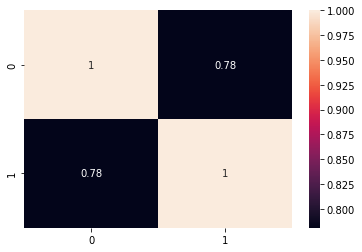

In [ ]:
from scipy.stats import linregress

from sklearn.metrics import r2_score

linregress(Merged_data_Sensor_Station['AthiRiver_x'], Merged_data_Sensor_Station['AthiRiver_y'])
pearsons_coefficient = np.corrcoef(Merged_data_Sensor_Station['AthiRiver_x'], Merged_data_Sensor_Station['AthiRiver_y'])
pearsons_coefficient2 = np.corrcoef(Merged_data_Sensor_Station['Ekalakala_x'], Merged_data_Sensor_Station['Ekalakala_x'])
sns.heatmap(pearsons_coefficient, annot=True)

print(linregress((Merged_data_Sensor_Station['AthiRiver_x'] -272.15), Merged_data_Sensor_Station['AthiRiver_y']))
print(linregress((Merged_data_Sensor_Station['Ekalakala_x'] -272.15), Merged_data_Sensor_Station['Ekalakala_y']))
print(linregress((Merged_data_Sensor_Station['Ikombe_x'] -272.15), Merged_data_Sensor_Station['Ikombe_y']))
# sns.heatmap(pearsons_coefficient2, annot=True)


**Getting the Tavg finding the average between the Min temperature and max temperature.**

In [ ]:
Min_Temp = pd.read_csv('/content/drive/MyDrive/AEZ_MACHAKOS_CSV/machakos-tmax_stations.csv')
Min_Temp.head()
Max_Temp = pd.read_csv('/content/drive/MyDrive/AEZ_MACHAKOS_CSV/machakos-tmin-stations.csv')
print(Max_Temp.size)
print(Min_Temp.size)

# concatenate dataframe 

Cont_Temp = pd.concat([Max_Temp, Min_Temp])
Cont_Temp.mean()

Blended_Temp = pd.DataFrame(Cont_Temp.mean()).reset_index().drop(1, )

Blended_Temp.rename(columns={'index' :'Place', 0 : 'Temperature'},inplace=True)

Blended_Temp.head()
Temp_mean = Blended_Temp.drop([0, ])

460236
460236


**Plotting temperature mean plots based on the averaged min and max temperatures**

In [ ]:
import seaborn as sn
fig = px.line(Temp_mean, x="Place", y="Temperature")
fig.show()

**Processing dataframe and preparing it to be ingested in the R function for computation of daily PET using either methods available.**

In [ ]:
Temperature_Sensor.head()

Place  Latitude  Longitude    19900101    19900102    19900103  \
0        AthiRiver  -1.45393   36.94743  290.254364  290.332977  290.393280   
1        Ekalakala  -0.97803   37.51094  293.274414  294.672943  294.432831   
2           Ikombe  -1.27343   37.62102  292.580963  293.524506  293.306580   
3           Kalama  -1.60166   37.31827  291.166962  291.633942  291.711762   
4  KangundoCentral  -1.31229   37.34610  291.513611  292.380341  292.422363   

     19900104    19900105    19900106    19900107  ...    20200630  \
0  290.647797  291.102783  291.279663  290.279480  ...  290.668182   
1  294.568603  294.532715  294.561798  294.111420  ...  294.866730   
2  293.201904  293.233551  293.298645  292.860748  ...  294.523468   
3  291.540070  291.798431  291.922699  291.460510  ...  292.339020   
4  292.319702  292.484039  292.503632  292.051483  ...  293.374603   

     20200701    20200702    20200703    20200704    20200705    20200706  \
0  290.071625  290.749359  290.168610  290.281036  290.493561  290.875122   
1  294.107758  294.369598  293.519501  294.491730  294.528961  294.695312   
2  293.569580  293.482513  292.659393  292.932129  293.329132  293.765564   
3  291.674896  291.619507  290.744598  290.994293  291.374420  291.791290   
4  292.568542  292.745941  291.782867  292.074188  292.379273  292.889435   

     20200707    20200708    20200709  
0  291.024567  290.784790  291.439087  
1  294.925323  294.788117  294.843140  
2  293.808563  294.366974  293.935944  
3  291.726837  292.076019  292.171753  
4  292.750427  293.223511  293.145538  

[5 rows x 11151 columns]

In [ ]:
Temperature_Sensor.head()

Place  Latitude  Longitude    19900101    19900102    19900103  \
0        AthiRiver  -1.45393   36.94743  290.254364  290.332977  290.393280   
1        Ekalakala  -0.97803   37.51094  293.274414  294.672943  294.432831   
2           Ikombe  -1.27343   37.62102  292.580963  293.524506  293.306580   
3           Kalama  -1.60166   37.31827  291.166962  291.633942  291.711762   
4  KangundoCentral  -1.31229   37.34610  291.513611  292.380341  292.422363   

     19900104    19900105    19900106    19900107  ...    20200630  \
0  290.647797  291.102783  291.279663  290.279480  ...  290.668182   
1  294.568603  294.532715  294.561798  294.111420  ...  294.866730   
2  293.201904  293.233551  293.298645  292.860748  ...  294.523468   
3  291.540070  291.798431  291.922699  291.460510  ...  292.339020   
4  292.319702  292.484039  292.503632  292.051483  ...  293.374603   

     20200701    20200702    20200703    20200704    20200705    20200706  \
0  290.071625  290.749359  290.168610  290.281036  290.493561  290.875122   
1  294.107758  294.369598  293.519501  294.491730  294.528961  294.695312   
2  293.569580  293.482513  292.659393  292.932129  293.329132  293.765564   
3  291.674896  291.619507  290.744598  290.994293  291.374420  291.791290   
4  292.568542  292.745941  291.782867  292.074188  292.379273  292.889435   

     20200707    20200708    20200709  
0  291.024567  290.784790  291.439087  
1  294.925323  294.788117  294.843140  
2  293.808563  294.366974  293.935944  
3  291.726837  292.076019  292.171753  
4  292.750427  293.223511  293.145538  

[5 rows x 11151 columns]

In [ ]:


""" Saving the locations as a separate dataframe for later use in merging to the final datasets for processing of PET in R """


Positions = Temperature_Sensor[['Place','Latitude','Longitude']]
Positions.head()

Positions.rename(columns = {'Place':'index'}, inplace = True)

Positions.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



index  Latitude  Longitude
0        AthiRiver  -1.45393   36.94743
1        Ekalakala  -0.97803   37.51094
2           Ikombe  -1.27343   37.62102
3           Kalama  -1.60166   37.31827
4  KangundoCentral  -1.31229   37.34610

In [ ]:

""" 
setting the new dataframe in a manner that can be used in formating the index column to Year, Month and Day to be used in PET computation in R 

"""
Temperature_Sensor_T_PET = Temperature_Sensor.drop(['Latitude', 'Longitude'], axis=1, inplace=False)
Temperature_Sensor_T_PET_T = Temperature_Sensor_T_PET.set_index('Place').T.reset_index()
Temperature_Sensor_T_PET_T.head()

Place     index   AthiRiver   Ekalakala      Ikombe      Kalama  \
0      19900101  290.254364  293.274414  292.580963  291.166962   
1      19900102  290.332977  294.672943  293.524506  291.633942   
2      19900103  290.393280  294.432831  293.306580  291.711762   
3      19900104  290.647797  294.568603  293.201904  291.540070   
4      19900105  291.102783  294.532715  293.233551  291.798431   

Place  KangundoCentral  KangundoEast  KangundoNorth  KangundoWest     Katangi  \
0           291.513611    291.513611     291.513611    291.513611  292.580963   
1           292.380341    292.380341     292.380341    292.380341  293.524506   
2           292.422363    292.422363     292.422363    292.422363  293.306580   
3           292.319702    292.319702     292.319702    292.319702  293.201904   
4           292.484039    292.484039     292.484039    292.484039  293.233551   

Place  ...    Muthwani    Mutituni  MuvutiKiimaKimwe     Ndalani    Ndithini  \
0      ...  290.626373  291.513611        291.166962  291.521790  291.874725   
1      ...  291.181488  292.380341        291.633942  292.412018  292.852142   
2      ...  291.373199  292.422363        291.711762  292.679199  293.016571   
3      ...  291.413330  292.319702        291.540070  292.673920  293.156647   
4      ...  291.702362  292.484039        291.798431  292.736511  293.116974   

Place  SyokimauMulolongo        Tala    unknown7  UpperKaewaIveti     Wamunyu  
0             290.254364  291.513611  290.586639       291.513611  292.580963  
1             290.332977  292.380341  290.680939       292.380341  293.524506  
2             290.393280  292.422363  290.871796       292.422363  293.306580  
3             290.647797  292.319702  290.863586       292.319702  293.201904  
4             291.102783  292.484039  291.245941       292.484039  293.233551  

[5 rows x 42 columns]

In [ ]:
"""
Converting the date column to year, month and day. Later the Dataframe will
 be merged with the other dataframe for processing purposes
 """
import datetime
from datetime import datetime
Temperature_Sensor_T_PET_T.head()

Just_Temp_Data = pd.DataFrame(columns=['Date','Year', 'Month', 'Day', 'index'])

    

In [ ]:
# Temperature_Sensor_T_PET_T.head()
Just_Temp_Data.head()

Date  Year Month Day     index
0  1990-01-01  1990     1   1  19900101
1  1990-01-02  1990     1   2  19900102
2  1990-01-03  1990     1   3  19900103
3  1990-01-04  1990     1   4  19900104
4  1990-01-05  1990     1   5  19900105

In [ ]:
Positions.head()

index  Latitude  Longitude
0        AthiRiver  -1.45393   36.94743
1        Ekalakala  -0.97803   37.51094
2           Ikombe  -1.27343   37.62102
3           Kalama  -1.60166   37.31827
4  KangundoCentral  -1.31229   37.34610

In [ ]:
"""
Merging the various dataframes with date, year adn day columns for processing thereafter
"""

Merged_Temp_Sensor_Station_4PET = pd.merge(Temperature_Sensor_T_PET_T, Just_Temp_Data, on="index")
Merged_Temp_Sensor_Station_4PET.head()

Merged_Temp_Transposed = Merged_Temp_Sensor_Station_4PET.set_index('index').T.reset_index()
Merged_Positions_Temp_Transposed = pd.merge(Merged_Temp_Transposed, Positions, on = "index")
Merged_Positions_Temp_Transposed.head()
# print(Merged_Positions_Temp_Transposed.columns)
Merged_Positions_Temp_Transposed.tail()
# print(Merged_Positions_Temp_Transposed['index'])
Merged_Temp_Sensor_Station_4PET.head()
# Merged_Temp_Transposed.tail()
# print(Merged_Temp_Transposed['index'])

""" 
 saving the prepared dataframe as a csv and using it in R for PET analysis
 """

Merged_Temp_Sensor_Station_4PET.to_csv('Merged_Temp_Sensor_Station_4PET.csv', index=True, encoding='utf-8')

In [ ]:
"""
using the daily PET to compute LGP for various years in each station

"""

Daily_PET = pd.read_csv('/content/drive/MyDrive/AEZ_MACHAKOS_CSV/DAILY_PET_DATA_COMPUTED_With_ROWS.csv')
Daily_PET

Year  Month  AthiRiver  Ekalakala     Ikombe     Kalama  \
0      1990      1  62.491018  75.015998  72.522278  66.941458   
1      1990      1  56.840613  80.845489  73.355952  63.690073   
2      1990      1  63.172583  86.594707  78.863946  70.918005   
3      1990      1  62.738424  84.935151  75.094883  67.057001   
4      1990      1  68.070438  87.132405  77.680276  71.172893   
...     ...    ...        ...        ...        ...        ...   
11143  2020      7  63.607341  87.223406  78.702442  67.891042   
11144  2020      7  64.517825  86.457973  80.506502  69.154345   
11145  2020      7  68.039432  92.226643  83.905907  71.184793   
11146  2020      7  64.257098  87.999205  86.894339  71.858097   
11147  2020      7  71.531507  91.663203  85.510519  75.144952   

       KangundoCentral  KangundoEast  KangundoNorth  KangundoWest  ...  \
0            66.400259     66.400259      66.400259     66.400259  ...   
1            66.458312     66.458312      66.458312     66.458312  ...   
2            73.709892     73.709892      73.709892     73.709892  ...   
3            70.223793     70.223793      70.223793     70.223793  ...   
4            73.782780     73.782780      73.782780     73.782780  ...   
...                ...           ...            ...           ...  ...   
11143        72.986118     72.986118      72.986118     72.986118  ...   
11144        75.220976     75.220976      75.220976     75.220976  ...   
11145        76.754119     76.754119      76.754119     76.754119  ...   
11146        78.641654     78.641654      78.641654     78.641654  ...   
11147        80.644321     80.644321      80.644321     80.644321  ...   

        Muthwani   Mutituni  MuvutiKiimaKimwe    Ndalani   Ndithini  \
0      62.911571  66.400259         66.941458  65.967588  68.777369   
1      60.562432  66.458312         63.690073  66.280702  69.703765   
2      68.346150  73.709892         70.918005  75.504039  78.417182   
3      66.216801  70.223793         67.057001  72.767512  76.859703   
4      70.534582  73.782780         71.172893  75.538771  78.838755   
...          ...        ...               ...        ...        ...   
11143  67.621987  72.986118         67.891042  77.481543  75.786313   
11144  69.232164  75.220976         69.154345  78.116494  76.078283   
11145  71.619110  76.754119         71.184793  79.099530  79.154459   
11146  70.610662  78.641654         71.858097  82.352182  75.994303   
11147  75.196772  80.644321         75.144952  84.274742  82.854612   

       SyokimauMulolongo       Tala   unknown7  UpperKaewaIveti    Wamunyu  
0              62.491018  66.400259  64.266278        66.400259  72.522278  
1              56.840613  66.458312  58.559812        66.458312  73.355952  
2              63.172583  73.709892  66.068598        73.709892  78.863946  
3              62.738424  70.223793  63.653571        70.223793  75.094883  
4              68.070438  73.782780  68.510807        73.782780  77.680276  
...                  ...        ...        ...              ...        ...  
11143          63.607341  72.986118  64.903066        72.986118  78.702442  
11144          64.517825  75.220976  65.486467        75.220976  80.506502  
11145          68.039432  76.754119  68.745734        76.754119  83.905907  
11146          64.257098  78.641654  66.875648        78.641654  86.894339  
11147          71.531507  80.644321  72.836343        80.644321  85.510519  

[11148 rows x 43 columns]

In [ ]:
"""
Computing the value of LGP per year based on the Rainfall Data. Rainfall data that is more than 0.5 PET should be considered as a day that crops could germinate, as some 
mositure was left in the soil. This starts by reading the daily PET that was computed in R using the thornthwite function, with Tavg and latitude as the input of the model

"""

Compututed_daily_PET = pd.read_csv('/content/drive/MyDrive/AEZ_MACHAKOS_CSV/DAILY_PET_DATA_COMPUTED_With_ROWS_FORLGP.csv')
Compututed_daily_PET.head()
Compututed_daily_PPT = pd.read_csv('/content/drive/MyDrive/AEZ_MACHAKOS_CSV/Rainfall_Sensor_1990_2020_Transposed_ROWS_forLGP_2.csv')
Compututed_daily_PPT.head()

"""
Comparing the values of daily precipitation and the values of daily PET
where PPT >= 0.5PET
"""

Compututed_daily_PPT.head()
# Compututed_daily_PET.head()


columns = Compututed_daily_PPT[['Year','Month']]
columns

Compututed_daily_PET

Year  Month  AthiRiver  Ekalakala     Ikombe     Kalama  \
0      1991      1  66.487146  81.047298  74.168048  68.498709   
1      1991      1  72.110218  92.796061  83.633321  76.892325   
2      1991      1  75.678730  89.153871  81.133655  75.994106   
3      1991      1  77.265975  95.906676  85.483354  78.417591   
4      1991      1  82.986311  99.821903  87.216883  80.981173   
...     ...    ...        ...        ...        ...        ...   
10778  2020      7  63.607341  87.223406  78.702442  67.891042   
10779  2020      7  64.517825  86.457973  80.506502  69.154345   
10780  2020      7  68.039432  92.226643  83.905907  71.184793   
10781  2020      7  64.257098  87.999205  86.894339  71.858097   
10782  2020      7  71.531507  91.663203  85.510519  75.144952   

       KangundoCentral  KangundoEast  KangundoNorth  KangundoWest  ...  \
0            70.990084     70.990084      70.990084     70.990084  ...   
1            77.894182     77.894182      77.894182     77.894182  ...   
2            78.360804     78.360804      78.360804     78.360804  ...   
3            81.249832     81.249832      81.249832     81.249832  ...   
4            84.412914     84.412914      84.412914     84.412914  ...   
...                ...           ...            ...           ...  ...   
10778        72.986118     72.986118      72.986118     72.986118  ...   
10779        75.220976     75.220976      75.220976     75.220976  ...   
10780        76.754119     76.754119      76.754119     76.754119  ...   
10781        78.641654     78.641654      78.641654     78.641654  ...   
10782        80.644321     80.644321      80.644321     80.644321  ...   

        Muthwani   Mutituni  MuvutiKiimaKimwe    Ndalani   Ndithini  \
0      67.586381  70.990084         68.498709  70.666447  73.154889   
1      73.419782  77.894182         76.892325  78.315527  79.890497   
2      76.087087  78.360804         75.994106  78.693320  80.926913   
3      77.627985  81.249832         78.417591  82.140370  87.176246   
4      82.342276  84.412914         80.981173  84.608221  88.309477   
...          ...        ...               ...        ...        ...   
10778  67.621987  72.986118         67.891042  77.481543  75.786313   
10779  69.232164  75.220976         69.154345  78.116494  76.078283   
10780  71.619110  76.754119         71.184793  79.099530  79.154459   
10781  70.610662  78.641654         71.858097  82.352182  75.994303   
10782  75.196772  80.644321         75.144952  84.274742  82.854612   

       SyokimauMulolongo       Tala   unknown7  UpperKaewaIveti    Wamunyu  
0              66.487146  70.990084  67.130994        70.990084  74.168048  
1              72.110218  77.894182  74.588749        77.894182  83.633321  
2              75.678730  78.360804  74.948931        78.360804  81.133655  
3              77.265975  81.249832  76.989922        81.249832  85.483354  
4              82.986311  84.412914  80.716394        84.412914  87.216883  
...                  ...        ...        ...              ...        ...  
10778          63.607341  72.986118  64.903066        72.986118  78.702442  
10779          64.517825  75.220976  65.486467        75.220976  80.506502  
10780          68.039432  76.754119  68.745734        76.754119  83.905907  
10781          64.257098  78.641654  66.875648        78.641654  86.894339  
10782          71.531507  80.644321  72.836343        80.644321  85.510519  

[10783 rows x 43 columns]

In [ ]:
"""
Comparing the dataframes of PET and daily Rainfall to analys LPG. The resultant dataframe was transformed to a bolean dataframe, where the days that
PPT was greater than PET, the value is 1, while the reverse was made to be 0. This is to necessitate the possibility of creating a pivot table of sum of days that 
of LPG

"""


'\nComparing the dataframes of PET and daily Rainfall to analys LPG. The resultant dataframe was transformed to a bolean dataframe, where the days that\nPPT was greater than PET, the value is 1, while the reverse was made to be 0. This is to necessitate the possibility of creating a pivot table of sum of days that \nof LPG\n\n'

In [ ]:
import pandas as pd
import numpy as np



final_df = pd.DataFrame()




Compututed_daily_PPT.head()
Compututed_daily_PET.head()

for column, col in range(len(Compututed_daily_PPT.iloc[: 2:42]), len(Compututed_daily_PET.iloc[: 2:42])):
    df = column  >= col/2

    print(df)  

    final_df = final_df.append(df)
final_df.head()

Empty DataFrame
Columns: []
Index: []

In [ ]:
Compututed_daily_PPT

Year  Month  AthiRiver  Ekalakala  Ikombe  Kalama  KangundoCentral  \
0      1991      1        0.0      23.42    0.00    0.00             0.00   
1      1991      1        0.0       0.00    0.00    0.00             0.00   
2      1991      1        0.0       0.00    0.00    0.00             0.00   
3      1991      1        0.0       0.00    7.67    7.39             8.08   
4      1991      1        0.0       0.00    0.00    0.00             0.00   
...     ...    ...        ...        ...     ...     ...              ...   
10778  2020      7        0.0       0.00    0.00    0.00             0.00   
10779  2020      7        0.0       0.00    0.00    0.00             0.00   
10780  2020      7        0.0       0.00    0.00    0.00             0.00   
10781  2020      7        0.0       0.00    0.00    0.00             0.00   
10782  2020      7        0.0       0.00    4.10    0.00             2.28   

       KangundoEast  KangundoNorth  KangundoWest  ...  Muthwani  Mutituni  \
0              0.00           0.00          0.00  ...      0.00      0.00   
1              0.00           0.00          0.00  ...      0.00      0.00   
2              0.00           0.00          0.00  ...      0.00      0.00   
3              7.68           6.17          7.76  ...      4.39      0.00   
4              0.00           0.00          0.00  ...      0.00      0.00   
...             ...            ...           ...  ...       ...       ...   
10778          0.00           0.00          0.00  ...      1.64      3.17   
10779          0.00           0.00          0.00  ...      0.00      0.00   
10780          0.00           0.00          0.00  ...      0.00      0.00   
10781          0.00           0.00          0.00  ...      0.00      0.00   
10782          0.00           5.50          0.00  ...      0.00      0.00   

       MuvutiKiimaKimwe  Ndalani  Ndithini  SyokimauMulolongo  Tala  unknown7  \
0                  0.00     0.00     24.30               0.00  0.00      0.00   
1                  0.00     0.00      0.00               0.00  0.00      0.00   
2                  0.00     6.38      0.00               0.00  0.00      0.00   
3                  7.15     0.00      0.00               4.29  6.44      4.15   
4                  0.00     0.00      0.00               0.00  0.00      0.00   
...                 ...      ...       ...                ...   ...       ...   
10778              0.00     0.00      0.00               2.91  0.00      0.00   
10779              0.00     0.00      0.00               0.00  0.00      0.00   
10780              0.00     0.00      0.00               0.00  0.00      0.00   
10781              0.00     0.00      0.00               0.00  0.00      0.00   
10782              0.00     3.85      5.35               0.00  5.86      0.00   

       UpperKaewaIveti  Wamunyu  
0                 0.00    26.31  
1                 0.00     0.00  
2                 0.00     0.00  
3                 7.57     0.00  
4                 0.00     0.00  
...                ...      ...  
10778             0.00     0.00  
10779             0.00     0.00  
10780             0.00     0.00  
10781             0.00     0.00  
10782             0.00     0.00  

[10783 rows x 43 columns]

In [ ]:



Compututed_daily_PPT
Compututed_daily_PET

Compututed_daily_PPT.eq(Compututed_daily_PET/2)

df_new = (Compututed_daily_PPT.iloc[:, 0:43]).ge(Compututed_daily_PET.iloc[:, 0:43]/2)
df_new


Compututed_daily_PET.iloc[:, 0:43]/2

Year  Month  AthiRiver  Ekalakala     Ikombe     Kalama  \
0       995.5    0.5  33.243573  40.523649  37.084024  34.249354   
1       995.5    0.5  36.055109  46.398030  41.816661  38.446163   
2       995.5    0.5  37.839365  44.576935  40.566827  37.997053   
3       995.5    0.5  38.632988  47.953338  42.741677  39.208796   
4       995.5    0.5  41.493155  49.910952  43.608441  40.490586   
...       ...    ...        ...        ...        ...        ...   
10778  1010.0    3.5  31.803670  43.611703  39.351221  33.945521   
10779  1010.0    3.5  32.258913  43.228987  40.253251  34.577172   
10780  1010.0    3.5  34.019716  46.113322  41.952953  35.592396   
10781  1010.0    3.5  32.128549  43.999603  43.447169  35.929048   
10782  1010.0    3.5  35.765754  45.831601  42.755259  37.572476   

       KangundoCentral  KangundoEast  KangundoNorth  KangundoWest  ...  \
0            35.495042     35.495042      35.495042     35.495042  ...   
1            38.947091     38.947091      38.947091     38.947091  ...   
2            39.180402     39.180402      39.180402     39.180402  ...   
3            40.624916     40.624916      40.624916     40.624916  ...   
4            42.206457     42.206457      42.206457     42.206457  ...   
...                ...           ...            ...           ...  ...   
10778        36.493059     36.493059      36.493059     36.493059  ...   
10779        37.610488     37.610488      37.610488     37.610488  ...   
10780        38.377060     38.377060      38.377060     38.377060  ...   
10781        39.320827     39.320827      39.320827     39.320827  ...   
10782        40.322161     40.322161      40.322161     40.322161  ...   

        Muthwani   Mutituni  MuvutiKiimaKimwe    Ndalani   Ndithini  \
0      33.793190  35.495042         34.249354  35.333224  36.577444   
1      36.709891  38.947091         38.446163  39.157764  39.945249   
2      38.043543  39.180402         37.997053  39.346660  40.463456   
3      38.813992  40.624916         39.208796  41.070185  43.588123   
4      41.171138  42.206457         40.490586  42.304110  44.154738   
...          ...        ...               ...        ...        ...   
10778  33.810994  36.493059         33.945521  38.740771  37.893157   
10779  34.616082  37.610488         34.577172  39.058247  38.039142   
10780  35.809555  38.377060         35.592396  39.549765  39.577229   
10781  35.305331  39.320827         35.929048  41.176091  37.997152   
10782  37.598386  40.322161         37.572476  42.137371  41.427306   

       SyokimauMulolongo       Tala   unknown7  UpperKaewaIveti    Wamunyu  
0              33.243573  35.495042  33.565497        35.495042  37.084024  
1              36.055109  38.947091  37.294375        38.947091  41.816661  
2              37.839365  39.180402  37.474466        39.180402  40.566827  
3              38.632988  40.624916  38.494961        40.624916  42.741677  
4              41.493155  42.206457  40.358197        42.206457  43.608441  
...                  ...        ...        ...              ...        ...  
10778          31.803670  36.493059  32.451533        36.493059  39.351221  
10779          32.258913  37.610488  32.743234        37.610488  40.253251  
10780          34.019716  38.377060  34.372867        38.377060  41.952953  
10781          32.128549  39.320827  33.437824        39.320827  43.447169  
10782          35.765754  40.322161  36.418171        40.322161  42.755259  

[10783 rows x 43 columns]

In [ ]:
df_new2 = df_new.replace({True: 1, False: 0})
df_new2



Year  Month  AthiRiver  Ekalakala  Ikombe  Kalama  KangundoCentral  \
0         1      1          0          0       0       0                0   
1         1      1          0          0       0       0                0   
2         1      1          0          0       0       0                0   
3         1      1          0          0       0       0                0   
4         1      1          0          0       0       0                0   
...     ...    ...        ...        ...     ...     ...              ...   
10778     1      1          0          0       0       0                0   
10779     1      1          0          0       0       0                0   
10780     1      1          0          0       0       0                0   
10781     1      1          0          0       0       0                0   
10782     1      1          0          0       0       0                0   

       KangundoEast  KangundoNorth  KangundoWest  ...  Muthwani  Mutituni  \
0                 0              0             0  ...         0         0   
1                 0              0             0  ...         0         0   
2                 0              0             0  ...         0         0   
3                 0              0             0  ...         0         0   
4                 0              0             0  ...         0         0   
...             ...            ...           ...  ...       ...       ...   
10778             0              0             0  ...         0         0   
10779             0              0             0  ...         0         0   
10780             0              0             0  ...         0         0   
10781             0              0             0  ...         0         0   
10782             0              0             0  ...         0         0   

       MuvutiKiimaKimwe  Ndalani  Ndithini  SyokimauMulolongo  Tala  unknown7  \
0                     0        0         0                  0     0         0   
1                     0        0         0                  0     0         0   
2                     0        0         0                  0     0         0   
3                     0        0         0                  0     0         0   
4                     0        0         0                  0     0         0   
...                 ...      ...       ...                ...   ...       ...   
10778                 0        0         0                  0     0         0   
10779                 0        0         0                  0     0         0   
10780                 0        0         0                  0     0         0   
10781                 0        0         0                  0     0         0   
10782                 0        0         0                  0     0         0   

       UpperKaewaIveti  Wamunyu  
0                    0        0  
1                    0        0  
2                    0        0  
3                    0        0  
4                    0        0  
...                ...      ...  
10778                0        0  
10779                0        0  
10780                0        0  
10781                0        0  
10782                0        0  

[10783 rows x 43 columns]

In [ ]:
df_new2['Year'] = columns['Year']
df_new2['Month'] = columns['Month']
PET_LPG_COUNTS = df_new2

PET_LPG_COUNTS

Year  Month  AthiRiver  Ekalakala  Ikombe  Kalama  KangundoCentral  \
0      1991      1          0          0       0       0                0   
1      1991      1          0          0       0       0                0   
2      1991      1          0          0       0       0                0   
3      1991      1          0          0       0       0                0   
4      1991      1          0          0       0       0                0   
...     ...    ...        ...        ...     ...     ...              ...   
10778  2020      7          0          0       0       0                0   
10779  2020      7          0          0       0       0                0   
10780  2020      7          0          0       0       0                0   
10781  2020      7          0          0       0       0                0   
10782  2020      7          0          0       0       0                0   

       KangundoEast  KangundoNorth  KangundoWest  ...  Muthwani  Mutituni  \
0                 0              0             0  ...         0         0   
1                 0              0             0  ...         0         0   
2                 0              0             0  ...         0         0   
3                 0              0             0  ...         0         0   
4                 0              0             0  ...         0         0   
...             ...            ...           ...  ...       ...       ...   
10778             0              0             0  ...         0         0   
10779             0              0             0  ...         0         0   
10780             0              0             0  ...         0         0   
10781             0              0             0  ...         0         0   
10782             0              0             0  ...         0         0   

       MuvutiKiimaKimwe  Ndalani  Ndithini  SyokimauMulolongo  Tala  unknown7  \
0                     0        0         0                  0     0         0   
1                     0        0         0                  0     0         0   
2                     0        0         0                  0     0         0   
3                     0        0         0                  0     0         0   
4                     0        0         0                  0     0         0   
...                 ...      ...       ...                ...   ...       ...   
10778                 0        0         0                  0     0         0   
10779                 0        0         0                  0     0         0   
10780                 0        0         0                  0     0         0   
10781                 0        0         0                  0     0         0   
10782                 0        0         0                  0     0         0   

       UpperKaewaIveti  Wamunyu  
0                    0        0  
1                    0        0  
2                    0        0  
3                    0        0  
4                    0        0  
...                ...      ...  
10778                0        0  
10779                0        0  
10780                0        0  
10781                0        0  
10782                0        0  

[10783 rows x 43 columns]

In [ ]:
PET_LPG_COUNTS

Year  Month  AthiRiver  Ekalakala  Ikombe  Kalama  KangundoCentral  \
0      1991      1          0          0       0       0                0   
1      1991      1          0          0       0       0                0   
2      1991      1          0          0       0       0                0   
3      1991      1          0          0       0       0                0   
4      1991      1          0          0       0       0                0   
...     ...    ...        ...        ...     ...     ...              ...   
10778  2020      7          0          0       0       0                0   
10779  2020      7          0          0       0       0                0   
10780  2020      7          0          0       0       0                0   
10781  2020      7          0          0       0       0                0   
10782  2020      7          0          0       0       0                0   

       KangundoEast  KangundoNorth  KangundoWest  ...  Muthwani  Mutituni  \
0                 0              0             0  ...         0         0   
1                 0              0             0  ...         0         0   
2                 0              0             0  ...         0         0   
3                 0              0             0  ...         0         0   
4                 0              0             0  ...         0         0   
...             ...            ...           ...  ...       ...       ...   
10778             0              0             0  ...         0         0   
10779             0              0             0  ...         0         0   
10780             0              0             0  ...         0         0   
10781             0              0             0  ...         0         0   
10782             0              0             0  ...         0         0   

       MuvutiKiimaKimwe  Ndalani  Ndithini  SyokimauMulolongo  Tala  unknown7  \
0                     0        0         0                  0     0         0   
1                     0        0         0                  0     0         0   
2                     0        0         0                  0     0         0   
3                     0        0         0                  0     0         0   
4                     0        0         0                  0     0         0   
...                 ...      ...       ...                ...   ...       ...   
10778                 0        0         0                  0     0         0   
10779                 0        0         0                  0     0         0   
10780                 0        0         0                  0     0         0   
10781                 0        0         0                  0     0         0   
10782                 0        0         0                  0     0         0   

       UpperKaewaIveti  Wamunyu  
0                    0        0  
1                    0        0  
2                    0        0  
3                    0        0  
4                    0        0  
...                ...      ...  
10778                0        0  
10779                0        0  
10780                0        0  
10781                0        0  
10782                0        0  

[10783 rows x 43 columns]

In [ ]:
"""
Creating a copy of the dataframe for summation analysis per year for the LPG
"""

PET_LPG_COUNTS_copy = PET_LPG_COUNTS.copy()



In [ ]:
"""
dropping the unecessary columns to compute the sum of number of LPG

"""
dropped_df = PET_LPG_COUNTS_copy.drop(['Year', 'Month'], axis=1)
dropped_df.head()

AthiRiver  Ekalakala  Ikombe  Kalama  KangundoCentral  KangundoEast  \
0          0          0       0       0                0             0   
1          0          0       0       0                0             0   
2          0          0       0       0                0             0   
3          0          0       0       0                0             0   
4          0          0       0       0                0             0   

   KangundoNorth  KangundoWest  Katangi  KathianiCentral  ...  Muthwani  \
0              0             0        0                0  ...         0   
1              0             0        0                0  ...         0   
2              0             0        0                0  ...         0   
3              0             0        0                0  ...         0   
4              0             0        0                0  ...         0   

   Mutituni  MuvutiKiimaKimwe  Ndalani  Ndithini  SyokimauMulolongo  Tala  \
0         0                 0        0         0                  0     0   
1         0                 0        0         0                  0     0   
2         0                 0        0         0                  0     0   
3         0                 0        0         0                  0     0   
4         0                 0        0         0                  0     0   

   unknown7  UpperKaewaIveti  Wamunyu  
0         0                0        0  
1         0                0        0  
2         0                0        0  
3         0                0        0  
4         0                0        0  

[5 rows x 41 columns]

In [ ]:
"""
Doing the row sum for each location to get the number of crop growing days in each location

"""

dropped_df_T = dropped_df.T
dropped_df_T_sum = dropped_df_T.sum(axis = 1).to_frame().reset_index()
dropped_df_T_sum
dropped_df_T_sum.head()
dropped_df_T_sum['Year']=columns['Year']
dropped_df_T_sum['Month']=columns['Month']
# df_new2['Year'] = columns['Year']
# df_new2['Month'] = columns['Month']

import seaborn as sn
fig = px.bar(dropped_df_T_sum, x="index", y=0)
fig.show()
# ax = sns.barplot(x="index", y=0, hue="Year", data=dropped_df_T_sum)
# dropped_df_T_sum
# dropped_df_T
"""
The plot shows the areas that had the hisgest number of crop growing days from 1991 to 2020. The data has not been filtered by season yet
"""

In [ ]:
"""
Filtering by seasons including OND and MAM for both epochs and findingh their LPG  per season in each location.

"""

dropped_df
dropped_df
dropped_df['Year']=columns['Year']
dropped_df['Month']=columns['Month']
dropped_df.head()

"""
Finding the LPG (MAM & OND) 1991 - 2005
"""
SELECTED1990_2005_MAM = dropped_df[(dropped_df['Year'] >= 1991) & (dropped_df['Year'] <= 2005) & (dropped_df['Month'] >= 3) & (dropped_df['Month'] <= 5) ]
SELECTED1990_2005_MAM
SELECTED1990_2005_OND = dropped_df[(dropped_df['Year'] >= 1991) & (dropped_df['Year'] <= 2005) & (dropped_df['Month'] >= 10) & (dropped_df['Month'] <= 12) ]
SELECTED1990_2005_OND

"""
Finding the LPG (MAM & OND) 2006 - 2021
"""

SELECTED2006_2020_OND = dropped_df[(dropped_df['Year'] >= 2006) & (dropped_df['Year'] <= 2020) & (dropped_df['Month'] >= 10) & (dropped_df['Month'] <= 12) ]

SELECTED2006_2020_MAM = dropped_df[(dropped_df['Year'] >= 2006) & (dropped_df['Year'] <= 2020) & (dropped_df['Month'] >= 3) & (dropped_df['Month'] <= 5) ]


"""
Rearranging the LPGs to plottabel both spatially and as charts and maps and getting the sum of OND days per season
"""

SELECTED_2006_2020_MAM_T = SELECTED2006_2020_MAM.drop(['Year', 'Month'], axis=1).T.sum(axis = 1).to_frame().rename(columns = {0:'Sum'}).reset_index()

SELECTED_2006_2020_OND_T = SELECTED2006_2020_OND.drop(['Year', 'Month'], axis=1).T.sum(axis = 1).to_frame().rename(columns = {0:'Sum'}).reset_index()

SELECTED_1990_2005_OND_T = SELECTED1990_2005_OND.drop(['Year', 'Month'], axis=1).T.sum(axis = 1).to_frame().rename(columns = {0:'Sum'}).reset_index()

SELECTED_1990_2005_MAM_T = SELECTED1990_2005_MAM.drop(['Year', 'Month'], axis=1).T.sum(axis = 1).to_frame().rename(columns = {0:'Sum'}).reset_index()





SELECTED_1990_2005_MAM_T


index  Sum
0           AthiRiver   23
1           Ekalakala   19
2              Ikombe   15
3              Kalama   31
4     KangundoCentral   26
5        KangundoEast   27
6       KangundoNorth   31
7        KangundoWest   26
8             Katangi   14
9     KathianiCentral   39
10            Kibauni   10
11            Kinanie   21
12          Kithimani   30
13              Kivaa   17
14               Kola   29
15            Kyeleni   41
16    LowerKaewaKaani   27
17    MachakosCentral   28
18      MakutanoMwala   26
19              Masii   21
20     MasingaCentral   12
21      MatunguluEast   31
22     MatunguluNorth   39
23      MatunguluWest   30
24              Matuu   20
25             Mbiuni   25
26           Mitaboni   26
27                Mua   19
28       MumbuniNorth   37
29           Muthesya   40
30         Muthetheni   15
31           Muthwani   21
32           Mutituni   35
33   MuvutiKiimaKimwe   28
34            Ndalani   28
35           Ndithini   36
36  SyokimauMulolongo   24
37               Tala   31
38           unknown7   27
39    UpperKaewaIveti   38
40            Wamunyu   15

In [ ]:
"""
SAVING THE LPGs AS CSV FOR MAP GENERATION OF LGP MAPS PER SEASON
"""

SELECTED_2006_2020_MAM_T
SELECTED_1990_2005_MAM_T
SELECTED_2006_2020_OND_T
SELECTED_1990_2005_OND_T

SELECTED_2006_2020_MAM_T.to_csv('SELECTED_2006_2020_MAM_T_LPG.csv', encoding='utf-8')
SELECTED_1990_2005_MAM_T.to_csv('SELECTED_1990_2005_MAM_T_LPG.csv', encoding='utf-8')
SELECTED_2006_2020_OND_T.to_csv('SELECTED_2006_2020_OND_T_LPG.csv', encoding='utf-8')
SELECTED_1990_2005_OND_T.to_csv('SELECTED_1990_2005_OND_T_LPG.csv', encoding='utf-8')

In [ ]:
"""
 LPG MAM 2006 TO 2020 GRAPH
"""
fig = px.bar(SELECTED_2006_2020_MAM_T, x="index", y='Sum')
fig.show()

In [ ]:
"""
 MAM 1990 TO 2005 GRAPH
"""
fig = px.bar(SELECTED_1990_2005_MAM_T, x="index", y='Sum')
fig.show()

In [ ]:
"""
 OND 2006 TO 2020 GRAPH
"""
fig = px.bar(SELECTED_2006_2020_OND_T, x="index", y='Sum')
fig.show()

In [ ]:

"""
 OND 1990 TO 2005 GRAPH
"""
fig = px.bar(SELECTED_1990_2005_OND_T, x="index", y='Sum')
fig.show()

In [ ]:
"""
finding the sum of number of LPG per day as a single count with a column, then later merging it with the whole dataset
"""
PET_LPG_COUNTS_copy_sum_per_day = dropped_df.sum(axis = 1).to_frame()
PET_LPG_COUNTS_copy_sum_per_day.rename(columns = {0:'Sum'}).astype(str)


Sum
0       0
1       0
2       0
3       0
4       0
...    ..
10778   0
10779   0
10780   0
10781   0
10782   0

[10783 rows x 1 columns]

In [ ]:
"""
combining the columns with the year and months with the LPG counts
"""
columns.reset_index(drop=True, inplace=True)
PET_LPG_COUNTS_copy_sum_per_day.reset_index(drop=True, inplace=True)
concatenated_summationLPG_ = pd.concat([PET_LPG_COUNTS_copy_sum_per_day, columns], axis=1)
concatenated_summationLPG_.rename(columns = {0:'Sum'})


Sum  Year  Month
0        9  1991      1
1        1  1991      1
2        5  1991      1
3       18  1991      1
4        0  1991      1
...    ...   ...    ...
10778    4  2020      7
10779    0  2020      7
10780    0  2020      7
10781    0  2020      7
10782   13  2020      7

[10783 rows x 3 columns]

In [ ]:
concatenated_summationLPG_[(concatenated_summationLPG_['Year'] == 2017) & (concatenated_summationLPG_[0] == 1)]

0  Year  Month
9510  1  2017      1
9544  1  2017      2
9550  1  2017      2
9551  1  2017      2
9552  1  2017      2
9583  1  2017      3
9607  1  2017      4
9616  1  2017      4
9617  1  2017      5
9671  1  2017      6
9688  1  2017      7
9698  1  2017      7
9712  1  2017      8
9736  1  2017      8
9743  1  2017      9
9754  1  2017      9
9761  1  2017      9
9786  1  2017     10
9803  1  2017     11
9823  1  2017     11

In [ ]:
# concatenated_summationLPG_[(concatenated_summationLPG_['Year'] == 2017) & (concatenated_summationLPG_[0] == 1)]
selected_columns = concatenated_summationLPG_[(concatenated_summationLPG_[0] == 1)]
selected_columns.head()
# df["A"][(df["B"] > 50) & (df["C"] == 900)]

0  Year  Month
1    1  1991      1
7    1  1991      1
19   1  1991      1
54   1  1991      2
103  1  1991      4

In [ ]:
# """"
# Drawing the number of days that the Pet was twice as much as rainfall from 1990 - 2005
# showing only a few days that had the said condition as can be seen in the graph.

# Number of crop growth days in each year, based on potential PET and received rainfall

# """"

fig = px.bar(selected_columns, x="Year", y=0)
fig = px.histogram(selected_columns, x="Year", y=0)
# fig = px.bar(selected_columns, x="Year", y=0)
fig.show()

In [ ]:
"""
Filtering the daily PET data based on MAM and OND seasons, for basically kriging for computation on LGD and combination with other datasets on googlea earth negine
This entails transforming to csv for later processing in excel to save on time
"""

Compututed_daily_PET.head()

PET_MAM_1991_2005 = Compututed_daily_PET[(Compututed_daily_PET['Year'] <= 2005) & (Compututed_daily_PET['Month'] >= 3) & (Compututed_daily_PET['Month'] <= 5) ]
PET_MAM_1991_2005_T = PET_MAM_1991_2005.set_index('Year').T
PET_MAM_1991_2005_T_mean = PET_MAM_1991_2005_T.mean(axis=1).to_frame().reset_index()
PET_MAM_1991_2005_T_mean.to_csv('PET_MAM_1991_2005_T_mean.csv', encoding='utf-8')

PET_OND_1991_2005 = Compututed_daily_PET[(Compututed_daily_PET['Year'] <= 2005) & (Compututed_daily_PET['Month'] >= 10) & (Compututed_daily_PET['Month'] <= 12) ]
PET_OND_1991_2005_T = PET_OND_1991_2005.set_index('Year').T
PET_OND_1991_2005_T_mean = PET_OND_1991_2005_T.mean(axis=1).to_frame().reset_index()
PET_OND_1991_2005_T_mean.to_csv('PET_OND_1991_2005_T_mean.csv', encoding='utf-8')

PET_OND_2006_2021 = Compututed_daily_PET[(Compututed_daily_PET['Year'] >= 2006) & (Compututed_daily_PET['Month'] >= 3) & (Compututed_daily_PET['Month'] <= 5) ]
PET_OND_2006_2021_T = PET_OND_2006_2021.set_index('Year').T
PET_OND_2006_2021_T_mean = PET_OND_2006_2021_T.mean(axis=1).to_frame().reset_index()
PET_OND_2006_2021_T_mean.to_csv('PET_OND_2006_2021_T_mean.csv', encoding='utf-8')


PET_MAM_2006_2021 = Compututed_daily_PET[(Compututed_daily_PET['Year'] >= 2006) & (Compututed_daily_PET['Month'] >= 10) & (Compututed_daily_PET['Month'] <= 12) ]
PET_MAM_2006_2021_T = PET_MAM_1991_2005.set_index('Year').T
PET_MAM_2006_2021_T_mean = PET_MAM_2006_2021_T.mean(axis=1).to_frame().reset_index()
PET_MAM_2006_2021_T_mean.to_csv('PET_MAM_2006_2021_T_mean.csv', encoding='utf-8')


PET_MAM_2006_2021_T.mean(axis=1)

for_latitude = pd.read_csv('/content/Temperature_csv_exports_ALL_1990-2020.csv')
for_latitude
LATLONG = for_latitude[['Place','Latitude','Longitude']]
LATLONG.to_csv('LATLONG.csv', encoding='utf-8')

# LATLONG_2 = LATLONG.rename(columns = {'Place':'index'}, inplace = True)
# PET_MAM_2006_2021_T_mean_merged = pd.merge(PET_MAM_2006_2021_T_mean, LATLONG_2, on="index")

# df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)

##  Trying calculating LPG based on montly PET and monthly PPT, and comparing their values to inform number of crop growth (months * 30 days)

In [ ]:
Monthly_PPT = pd.read_csv('/content/MonthlyPPT_1990-2021.csv')
Monthly_PET = pd.read_csv('/content/MonthlyPET_1990-2021.csv')

# Merged_Temp_Transposed = Merged_Temp_Sensor_Station_4PET.set_index('index').T.reset_index()

Monthly_PPT_T = Monthly_PPT.set_index('Place').T.reset_index()
Monthly_PET_T = Monthly_PET.set_index('Place').T.reset_index()
 

In [ ]:
Monthly_PET_T_copy = Monthly_PET_T.copy()
Monthly_PET_T_copy = Monthly_PET_T_copy[['index']]
Monthly_PET_T_copy

Place   index
0      199001
1      199002
2      199003
3      199004
4      199005
..        ...
378    202107
379    202108
380    202109
381    202110
382    202111

[383 rows x 1 columns]

In [ ]:
"""
Converting the date column to date and month and then re-merging with the previous dataframes

"""

from datetime import datetime

df = pd.DataFrame(columns=['Year','Month'])

for data in range(len(Monthly_PET_T_copy)):
  # print(ppt_llpg_fitered.iloc[data,0])
  date_coverted = datetime.strptime(str(Monthly_PET_T_copy.iloc[data,0]),'%Y%m')
  Year = date_coverted.date().year
  Month = date_coverted.date().month

  df = df.append({'Year':Year,'Month':Month}, ignore_index=True)


df.head()

Year Month
0  1990     1
1  1990     2
2  1990     3
3  1990     4
4  1990     5

In [ ]:
Monthly_PPT_T_conc = pd.concat([Monthly_PPT_T, df], axis=1)
Monthly_PET_T_conc = pd.concat([Monthly_PET_T, df], axis=1)


# df.drop("column_name", axis=1, inplace=True)
# Monthly_PPT_T
# Monthly_PET_T 
#  pd.concat([PET_LPG_COUNTS_copy_sum_per_day, columns], axis=1)

Monthly_PET_T_conc
# Monthly_PPT_T_conc

index  AthiRiver  Ekalakala  Ikombe  Kalama  KangundoCentral  \
0    199001       1412       1413    1322    1328             1261   
1    199002       1302       1351    1299    1252             1226   
2    199003       1296       1308    1266    1239             1230   
3    199004       1082       1165    1136    1033             1049   
4    199005       1103       1240    1186    1110             1086   
..      ...        ...        ...     ...     ...              ...   
378  202107       1028       1158    1102    1002              954   
379  202108       1124       1248    1257    1102             1047   
380  202109       1299       1443    1383    1297             1248   
381  202110       1421       1564    1487    1415             1381   
382  202111       1357       1419    1372    1300             1300   

     KangundoEast  KangundoNorth  KangundoWest  Katangi  ...  \
0            1283           1269          1303     1326  ...   
1            1250           1229          1268     1303  ...   
2            1247           1221          1257     1270  ...   
3            1073           1063          1063     1110  ...   
4            1145           1116          1134     1198  ...   
..            ...            ...           ...      ...  ...   
378          1042           1007          1026     1146  ...   
379          1132           1094          1120     1284  ...   
380          1337           1304          1322     1411  ...   
381          1448           1408          1439     1497  ...   
382          1325           1301          1323     1412  ...   

     MuvutiKiimaKimwe  Ndalani  Ndithini  SyokimauMulolongo  Tala  unknown7  \
0                1259     1377      1408               1374  1331      1303   
1                1212     1340      1356               1282  1257      1198   
2                1208     1336      1365               1293  1241      1217   
3                1033     1144      1149               1076  1084      1018   
4                1079     1232      1217               1090  1125      1058   
..                ...      ...       ...                ...   ...       ...   
378               965     1152      1060                999   979       938   
379              1053     1244      1154               1106  1096      1039   
380              1257     1428      1376               1278  1294      1225   
381              1359     1551      1544               1424  1420      1344   
382              1276     1421      1434               1335  1327      1268   

     UpperKaewaIveti  Wamunyu  Year  Month  
0               1203     1314  1990      1  
1               1150     1324  1990      2  
2               1136     1316  1990      3  
3                968     1141  1990      4  
4               1026     1196  1990      5  
..               ...      ...   ...    ...  
378              897     1116  2021      7  
379              981     1253  2021      8  
380             1178     1399  2021      9  
381             1312     1506  2021     10  
382             1204     1403  2021     11  

[383 rows x 44 columns]

In [ ]:
PET_PPT_MONTHLY_COMPARISON = (Monthly_PPT_T_conc.iloc[:, 1:42]).ge(Monthly_PET_T_conc.iloc[:, 1:42]/2)
PET_PPT_MONTHLY_COMPARISON

AthiRiver  Ekalakala  Ikombe  Kalama  KangundoCentral  KangundoEast  \
0        False      False   False   False            False         False   
1        False      False   False   False            False         False   
2        False      False   False   False            False         False   
3        False      False   False   False            False         False   
4        False      False   False   False            False         False   
..         ...        ...     ...     ...              ...           ...   
378      False      False   False   False            False         False   
379      False      False   False   False            False         False   
380      False      False   False   False            False         False   
381      False      False   False   False            False         False   
382      False      False   False   False            False         False   

     KangundoNorth  KangundoWest  Katangi  KathianiCentral  ...  Muthwani  \
0            False         False    False            False  ...     False   
1            False         False    False            False  ...     False   
2            False         False    False            False  ...     False   
3            False         False    False            False  ...     False   
4            False         False    False            False  ...     False   
..             ...           ...      ...              ...  ...       ...   
378          False         False    False            False  ...     False   
379          False         False    False            False  ...     False   
380          False         False    False            False  ...     False   
381          False         False    False            False  ...     False   
382          False         False    False            False  ...     False   

     Mutituni  MuvutiKiimaKimwe  Ndalani  Ndithini  SyokimauMulolongo   Tala  \
0       False             False    False     False              False  False   
1       False             False    False     False              False  False   
2       False             False    False     False              False  False   
3       False             False    False     False              False  False   
4       False             False    False     False              False  False   
..        ...               ...      ...       ...                ...    ...   
378     False             False    False     False              False  False   
379     False             False    False     False              False  False   
380     False             False    False     False              False  False   
381     False             False    False     False              False  False   
382     False             False    False     False              False  False   

     unknown7  UpperKaewaIveti  Wamunyu  
0       False            False    False  
1       False            False    False  
2       False            False    False  
3       False            False    False  
4       False            False    False  
..        ...              ...      ...  
378     False            False    False  
379     False            False    False  
380     False            False    False  
381     False            False    False  
382     False            False    False  

[383 rows x 41 columns]

In [ ]:
pet_replaced_ = PET_PPT_MONTHLY_COMPARISON.replace({True: 1, False: 0})
pet_replaced_

AthiRiver  Ekalakala  Ikombe  Kalama  KangundoCentral  KangundoEast  \
0            0          0       0       0                0             0   
1            0          0       0       0                0             0   
2            0          0       0       0                0             0   
3            0          0       0       0                0             0   
4            0          0       0       0                0             0   
..         ...        ...     ...     ...              ...           ...   
378          0          0       0       0                0             0   
379          0          0       0       0                0             0   
380          0          0       0       0                0             0   
381          0          0       0       0                0             0   
382          0          0       0       0                0             0   

     KangundoNorth  KangundoWest  Katangi  KathianiCentral  ...  Muthwani  \
0                0             0        0                0  ...         0   
1                0             0        0                0  ...         0   
2                0             0        0                0  ...         0   
3                0             0        0                0  ...         0   
4                0             0        0                0  ...         0   
..             ...           ...      ...              ...  ...       ...   
378              0             0        0                0  ...         0   
379              0             0        0                0  ...         0   
380              0             0        0                0  ...         0   
381              0             0        0                0  ...         0   
382              0             0        0                0  ...         0   

     Mutituni  MuvutiKiimaKimwe  Ndalani  Ndithini  SyokimauMulolongo  Tala  \
0           0                 0        0         0                  0     0   
1           0                 0        0         0                  0     0   
2           0                 0        0         0                  0     0   
3           0                 0        0         0                  0     0   
4           0                 0        0         0                  0     0   
..        ...               ...      ...       ...                ...   ...   
378         0                 0        0         0                  0     0   
379         0                 0        0         0                  0     0   
380         0                 0        0         0                  0     0   
381         0                 0        0         0                  0     0   
382         0                 0        0         0                  0     0   

     unknown7  UpperKaewaIveti  Wamunyu  
0           0                0        0  
1           0                0        0  
2           0                0        0  
3           0                0        0  
4           0                0        0  
..        ...              ...      ...  
378         0                0        0  
379         0                0        0  
380         0                0        0  
381         0                0        0  
382         0                0        0  

[383 rows x 41 columns]

In [ ]:
summation_monthly = pet_replaced_.sum(axis = 1).to_frame()
summation_monthly

0
0    0
1    0
2    0
3    0
4    0
..  ..
378  0
379  0
380  0
381  0
382  0

[383 rows x 1 columns]

In [ ]:
# PET_PPT_MONTHLY_COMPARISON
MONTHLY_COMPA_CONCAT = pd.concat([summation_monthly, df], axis=1)
MONTHLY_COMPA_CONCAT

0  Year Month
0    0  1990     1
1    0  1990     2
2    0  1990     3
3    0  1990     4
4    0  1990     5
..  ..   ...   ...
378  0  2021     7
379  0  2021     8
380  0  2021     9
381  0  2021    10
382  0  2021    11

[383 rows x 3 columns]

In [ ]:
selected_columns_2 = MONTHLY_COMPA_CONCAT[(MONTHLY_COMPA_CONCAT[0] == 1)]
selected_columns_2

0  Year Month
94  1  1997    11

In [ ]:
fig = px.bar(selected_columns_2, x="Year", y=0)
fig.show()

In [ ]:
MONTHLY_COMPA_CONCAT[(MONTHLY_COMPA_CONCAT['Year'] == 2008) & (MONTHLY_COMPA_CONCAT[0] == 0)]

0  Year Month
216  0  2008     1
217  0  2008     2
218  0  2008     3
219  0  2008     4
220  0  2008     5
221  0  2008     6
222  0  2008     7
223  0  2008     8
224  0  2008     9
225  0  2008    10
226  0  2008    11
227  0  2008    12

In [ ]:
selected_columns_monthly = MONTHLY_COMPA_CONCAT[(MONTHLY_COMPA_CONCAT[0] == 1)]